**Pré-Processamento - Mineração de Dados**


**Nome: Davi Augusto Neves Leite**

**Data de Entrega: 19/09/2023**


---


# **Materiais**


Os principais recursos para a execução desta atividade podem ser vistos a seguir.

1. <strong>Software</strong>

- Sistemas Operacionais: Windows 11 para _desktop_;
- Ambiente de Desenvolvimento Integrado: Microsoft Visual Studio Code;
- Linguagem de Programação: Python 3.11.5 64-bit.

2. <strong>Hardware</strong>

- Notebook pessoal Lenovo Ideapad 330-15IKB com: processador Intel Core i7-8550U, HDD WD Blue WD10SPZX de 1TB, SSD Crucial BX500 de 240GB, 12 GB DDR4 de Memória RAM e placa de vídeo NVIDIA GeForce MX150 (2 GB GDDR5 de memória).


---


# **Importação das Bibliotecas Principais**

Nota: ao decorrer deste Notebook, outras bibliotecas podem ser utilizadas em quaisquer respectiva seção/conjunto de dados, dependendo da necessidade. Abaixo, há a importação das principais que são comuns e utilizadas em todas ou quase todas seções/conjunto de dados.


In [372]:
import numpy as np      # Manipulação de listas
import pandas as pd     # Manipulação de tabelas
import seaborn as sbn   # Geração de gráficos estatísticos
import matplotlib.pyplot as plt  # Geração de gráficos de listas
import sklearn as skl   # Biblioteca para pré-processamento
from copy import copy as cp  # Possibilitar copiar os objetos

# Ignorar os avisos não importantes durante a execução deste notebook
import warnings
warnings.filterwarnings('ignore')


---


# Conjunto Numérico: **_Rice (Cammeo and Osmancik)_**


**Descrição do Dataset:** este conjunto é composto por 3810 dados obtidos acerca de duas espécies diferentes de grãos de arroz na Turquia. Os dados estão compostos por 7 características morfológicas (atributos) destes grãos: área, perímetro, comprimento do eixo principal, comprimento do eixo menor, excentricidade, área convexa e extensão.

A descrição de cada atributo pode ser vista a seguir.

1. **Área (decimal):** número de pixels dentro dos limites do grão de arroz;
2. **Perímetro (decimal):** circunferência do grão de arroz por meio do cálculo da distância de pixels ao redor dos limites do grão de arroz;
3. **Comprimento do Eixo Principal (decimal):** linha mais longa que pode ser desenhada no grão de arroz;
4. **Comprimento do Eixo Menor (decimal):** linha mais curta que pode ser desenhada no grão de arroz;
5. **Excentricidade (decimal):** medida que diz respeito ao quão redonda é a elipse do grão de arroz;
6. **Área convexa (inteiro):** contagem de pixels da menor concha convexa da região formada pelo grão de arroz;
7. **Extensão (decimal):** proporção da região formada pelo grão de arroz em relação aos pixels da caixa delimitadora.

Especificamente, as espécies estudadas foram a _Osmancik_ e a _Cammeo_, ambas com características semelhantes de uma aparência larga, longa e sem brilho.

Este conjunto de dados pode ser acessado por meio de: [Rice (Cammeo and Osmancik)](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)
(última data de acesso: 15 de set. de 2023).


## <strong> Informações Básicas </strong>


In [373]:
# Acesso dos dados do dataset "Rice"
from scipy.io.arff import loadarff  # Carregar arquivo tipo .arff

dataset_rice_arff = loadarff('./Datasets/01_Rice_Cammeo_Osmancik.arff')
data = pd.DataFrame(data=dataset_rice_arff[0])

# Mostra os 5 primeiros e últimos registros
data


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [374]:
# Mostra os 5 primeiros registros, formatados
data.head()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'


In [375]:
# Mostra os 5 últimos registros, formatados
data.tail()


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,b'Osmancik'


In [376]:
# Mostra a quantidade de linhas e colunas da tabela (tupla)
data.shape


(3810, 8)

In [377]:
# Mostra as informações dos atributos e outras do dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB


## <strong> Exploração dos Dados </strong>


### Dados Simples: Média, Desvio-Padrão, Mínimo, Mediana, Máximo


In [378]:
import pandas.api.types as pd_types  # Identificar o tipo de dado do dataset

# Percorrer cada atributo (coluna) e mostrar os dados estatísticos básicos de cada um
for col in data.columns:
    if pd_types.is_numeric_dtype(data[col]):
        print(f'{col}')
        print('\t Média = {:.2f}'.format(data[col].mean()))
        print('\t Desvio-Padrão = {:.2f}'.format(data[col].std()))
        print('\t Mínimo = {:.2f}'.format(data[col].min()))
        print('\t Mediana = {:.2f}'.format(data[col].median()))
        print('\t Máximo = {:.2f}'.format(data[col].max()))


Area
	 Média = 12667.73
	 Desvio-Padrão = 1732.37
	 Mínimo = 7551.00
	 Mediana = 12421.50
	 Máximo = 18913.00
Perimeter
	 Média = 454.24
	 Desvio-Padrão = 35.60
	 Mínimo = 359.10
	 Mediana = 448.85
	 Máximo = 548.45
Major_Axis_Length
	 Média = 188.78
	 Desvio-Padrão = 17.45
	 Mínimo = 145.26
	 Mediana = 185.81
	 Máximo = 239.01
Minor_Axis_Length
	 Média = 86.31
	 Desvio-Padrão = 5.73
	 Mínimo = 59.53
	 Mediana = 86.43
	 Máximo = 107.54
Eccentricity
	 Média = 0.89
	 Desvio-Padrão = 0.02
	 Mínimo = 0.78
	 Mediana = 0.89
	 Máximo = 0.95
Convex_Area
	 Média = 12952.50
	 Desvio-Padrão = 1776.97
	 Mínimo = 7723.00
	 Mediana = 12706.50
	 Máximo = 19099.00
Extent
	 Média = 0.66
	 Desvio-Padrão = 0.08
	 Mínimo = 0.50
	 Mediana = 0.65
	 Máximo = 0.86


### Quantidade de Dados de Cada Classe


In [379]:
# Retornar a quantidade de classes do dataset por meio da coluna "Class"
# Nota: o nome da coluna deve ser exatamente igual ao do dataset (case-sensitive)
data['Class'].value_counts()


Class
b'Osmancik'    2180
b'Cammeo'      1630
Name: count, dtype: int64

### Dados Estatísticos Completos Para Cada Atributo


Neste primeiro caso, são incluídos tanto os dados estatísticos básicos, como média e desvio padrão, quanto alguns dos mais avançados, como os percentis (25%, 50% e 75%). Vale ressaltar que neste caso há a análise para cada atributo separadamente, ou seja, dados como covariância, a qual relaciona os atributos entre si, não são mostrados.


In [380]:
# Retornar, para cada atributo (coluna), a descrição estatística completa
# Incluem: média, frequência, mínimo, percentis (25, 50 e 75), dentre outros
data.describe(include='all')


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'Osmancik'
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,NaN
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,NaN
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,NaN
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862,NaN
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,NaN
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,NaN


É possível inferir, por exemplo, que a classe "Osmancik" é a mais recorrente com a existência de 2180 registros do total de 3810 deste _dataset_.


No caso abaixo, há a medida de correlação de cada par de atributos por meio do cálculo da chamada variância. A variança mede o quanto os dados estão dispersos em torno da média e, para isso, utiliza-se diretamente do desvio-padrão. Em termos práticos: quanto menor é a variância, mais próximos os valores estão da média.


In [381]:
print('Covariância:')

# Mostrando os dados na forma de tabela
data.cov(numeric_only=True)


Covariância:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,3.001098e+06,59598.487027,27295.901605,7820.219745,12.697890,3.075103e+06,-8.186820
Perimeter,5.959849e+04,1267.152207,603.658849,128.462718,0.403575,6.135336e+04,-0.359969
Major_Axis_Length,2.729590e+04,603.658849,304.456381,45.199146,0.258226,2.801005e+04,-0.188090
Minor_Axis_Length,7.820220e+03,128.462718,45.199146,32.830807,-0.034792,8.016253e+03,0.028044
Eccentricity,1.269789e+01,0.403575,0.258226,-0.034792,0.000433,1.304780e+01,-0.000319
Convex_Area,3.075103e+06,61353.358157,28010.051333,8016.253386,13.047800,3.157630e+06,-9.034724
Extent,-8.186820e+00,-0.359969,-0.188090,0.028044,-0.000319,-9.034724e+00,0.005966


<Axes: >

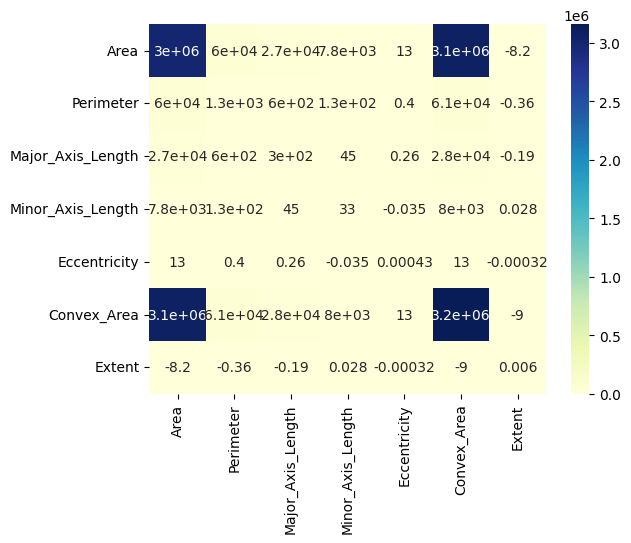

In [382]:
# Mostrando na forma de mapa de calor
sbn.heatmap(data.cov(numeric_only=True), annot=True, cmap='YlGnBu')


Também, é possível visualizar a seguir os _boxplots_ de cada atributo, os quais mostram a distribuição de valores a partir dos limitantes inferior e superior e com uma "caixa" que indica a concentração de valores.


<Axes: >

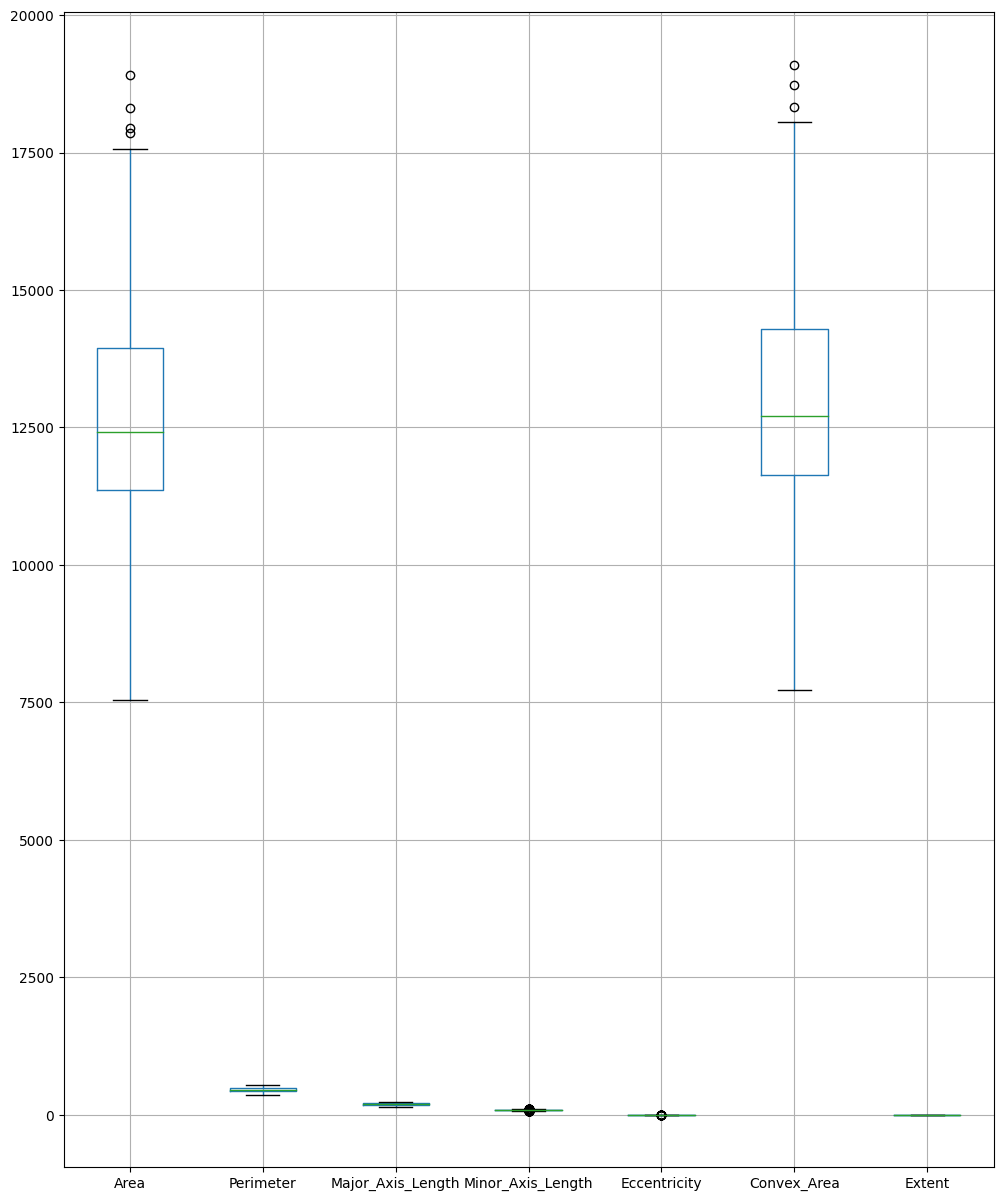

In [383]:
# Plotando todos os boxplots num mesmo gráfico
data.boxplot(figsize=(12, 15))


Tomando como exemplo o atributo _Area_, é possível visualizar no gráfico acima que a maior concentração de dados está na faixa de valores do intervalo de _10000 e 15000_, com o mínimo sendo em _7500_ e o máximo sendo próximo de _20000_, sendo este máximo considerado um ruído (ou _outlier_, a ser visto na próxima seção).
Contudo, especialmente ao comparar os atributos de _Area_ e _Convex_Area_ com os demais nota-se que os dados plotados estão em escalas bem diferentes e, portanto, isso indica que deve ser realizado uma normalização deste conjunto para que seja possível analisar e, posteriormente, processar os dados de forma mais otimizada. A normalização será tratada na seção de **Pré-Processamento dos Dados**.


Por fim, outro tipo de gráfico bastante usado para análise é o de _scatter_. Abaixo, é possível visualizar os dados de cada classe como pontos na tupla de atributos relacionados _Area, Convex_Area_.


<Axes: xlabel='Area', ylabel='Convex_Area'>

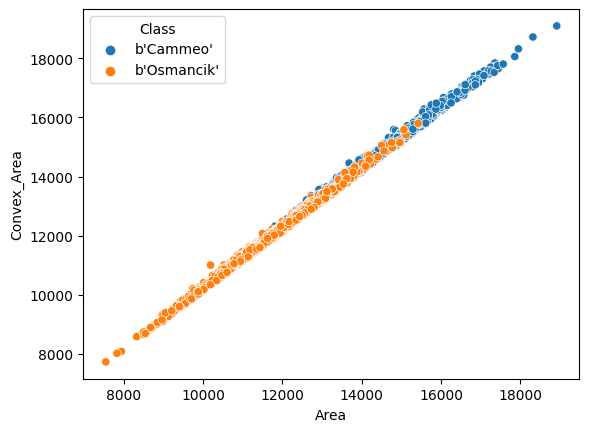

In [384]:
sbn.scatterplot(data=data, x='Area', y='Convex_Area', hue='Class')


É possível inferir, por exemplo, que uma grande parte de dados da classe _Osmancik_ possui áreas que a classe _Cammeo_ não possui, nos intervalos de valores entre _0 à 10000_. Também, é possível visualizar que muitos dados das duas classes estão sobrepostos uns com os outros.


## <strong> Pré-Processamento dos Dados </strong>


O pré-processamento consiste na aplicação de diversas técnicas para limpar, selecionar e transformar os dados para melhorar a análise dos mesmos. Algumas técnicas: Agregação, _Sampling_, **_Feature Selection_**, **Redução da Dimensionalidade**, **_Feature Creation_**, Discretização/Binarização, dentre outras.


### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Não é incomum que um dado não tenha um ou mais valores de atributos, devido a informações não coletadas ou, até mesmo, esses atributos não se aplicarem às instâncias de dados. Contudo, independente do motivo em que há a falta de dados, é necessário realizar um tratamento para evitar problemas de análise. O tratamento para os chamados "dados perdidos" (ou inexistentes) pode ser realizado de duas principais formas: substituir os valores pela mediana daquele atributo; ou simplesmente descartar aquele dado.


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [385]:
# Substituindo os dados faltantes '?' por 'np.NaN' para ser possível analisar
data = data.replace('?', np.NaN)

print('Número de Instâncias = {0}'.format(data.shape[0]))
print('Número de Atributos = {0}'.format(data.shape[1]))

# Mostrando a quantidade total de dados inválidos, por atributo
print('Número de Dados Perdidos:')
for col in data.columns:
    print('\t{0}: {1}'.format(col, data[col].isna().sum()))


Número de Instâncias = 3810
Número de Atributos = 8
Número de Dados Perdidos:
	Area: 0
	Perimeter: 0
	Major_Axis_Length: 0
	Minor_Axis_Length: 0
	Eccentricity: 0
	Convex_Area: 0
	Extent: 0
	Class: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Tratamento de _Outliers_ (Ruídos)


Os _Outliers_ simbolizam dados com características que são consideravelmente diferentes da maioria dos outros dados em um _dataset_. Em outras palavras, simbolizam ruídos que atrapalham ou ajudam na análise dos dados, dependendo do objetivo.

Para identificá-los, é possível por duas abordagens: com base na possibilidade de obter exemplos rotulados pelo usuário, como pelos métodos supervisionados; ou com base em suposições sobre dados normais, como pelo **DBSCAN**. Uma maneira comum consiste em encontrar os percentis e calcular o gráfico de _boxplot_, sendo que os _outliers_ devem seguir as seguintes condições, com base nos limitantes inferior (LB) e superior (UB) do gráfico:

- **Oulier < LB:** Outlier = (Q1 - 1.5 \* IQR), em que Q1 é o percentil de 25%
- **Outlier > UB:** Outlier = (Q3 + 1.5 \* IQR), em que Q3 é o percentil de 75%


Em termos práticos, os gráficos de _boxplot_ deste _dataset_ para os atributos _Area_ e _Convex_Area_, visto com _outlier_ na seção anterior, podem ser vistos a seguir.


<Axes: >

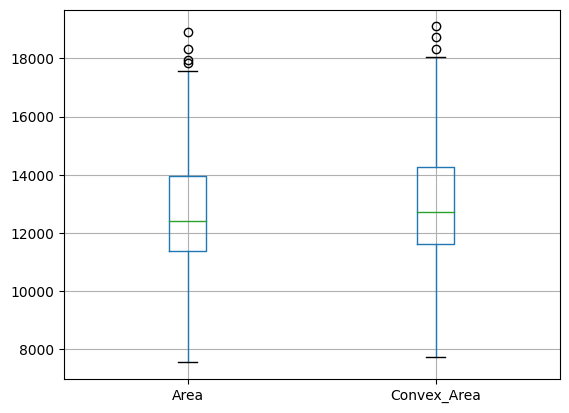

In [386]:
# Plotando o boxplot para 'Area' e 'Convex_Area'
data.boxplot(column=['Area', 'Convex_Area'])


Como pode ser visto acima, ambos os atributos possuem _outliers_ no limitante superior.

Para remover os _outliers_, por meio dos percentis, basta aplicar a seguinte função:


In [387]:
# Função para remoção dos outliers por meio dos percentis (IQR)
# Disponível em: https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    LB = Q1-1.5*IQR
    UB = Q3+1.5*IQR
    return df[(df < LB) | (df > UB)]


Aplicando a função e removendo os _outliers_ dos atributos _Area_ e _Convex_Area_:


In [388]:
# Removendo os outliers de 'Area'
data_outlier_removed = remove_outlier_IQR(data['Area'])

# Atualizando o dataset principal com a remoção dos outliers
data_iqr = data.drop(data_outlier_removed.index)

# Removendo os outliers de 'Convex_Area'
data_outlier_removed = remove_outlier_IQR(data_iqr['Convex_Area'])

# Atualizando o dataset principal com a remoção dos outliers
data_iqr = data_iqr.drop(data_outlier_removed.index)


<Axes: >

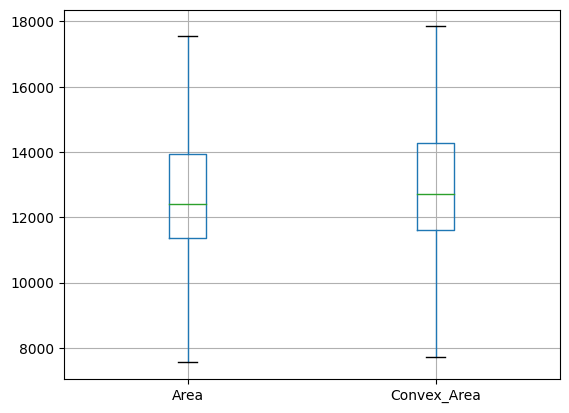

In [389]:
# Plotando novamente os boxplots para 'Area' e 'Convex_Area', desta vez com outliers removidos
data_iqr.boxplot(column=['Area', 'Convex_Area'])


### Agregação


A agregação é uma tarefa que consistem em combinar os valores de dois ou mais objetos do _dataset_, de tal forma em que se possa reduzir a dimensionalidade do problema, alterar a granularidade da análise e melhorar a estabilidade dos dados. Deve ser aplicada quando possível, por exemplo em um _dataset_ em que há _as transações de vendas de uma única loja_.

Para exemplificar, a seguir estão os _boxplots_ dos atributos _Area_ e _Convex_Area_ do _dataset_ agregado apenas para a classe **_Cammeo_**.


         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
1625  15879.0  517.927002         216.650131          94.656204      0.899506   
1626  14330.0  493.184998         209.767319          87.898949      0.907972   
1627  14155.0  480.522003         200.546738          91.059677      0.890973   
1628  13939.0  484.393005         207.026276          86.223473      0.909142   
1629  12488.0  469.828003         200.743759          80.046852      0.917059   

      Convex_Area    Extent

<Axes: >

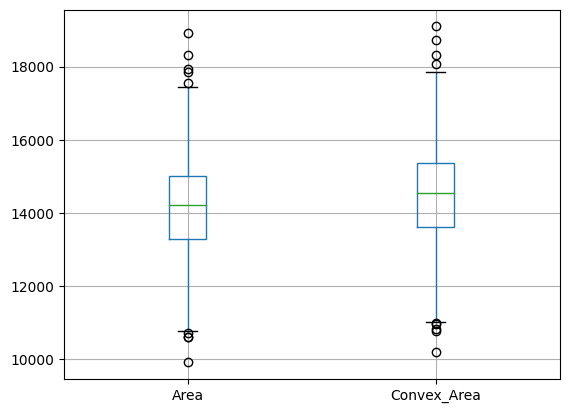

In [390]:
# Recuperando apenas os dados relacionados a classe 'Cammeo'
data_cammeo = data[data['Class'] == b'Cammeo']
print(data_cammeo)

# Plotando o boxplot de 'Area' e 'Convex_Area'
data_cammeo.boxplot(column=['Area', 'Convex_Area'])


Nesta agregação, é possível visualizar somente os dados relacionados à classe _Cammeo_ e, desta forma, é possível realizar uma análise mais específica a respeito desta classe, como no que diz respeito a existência de _outliers_ inferiores e superiores dos atributos _Area_ e _Convex_Area_.


### Amostragem


A amostragem, ou _sampling_, é a principal técnica empregada para reduzir dados nos _datasets_ e é utilizada frequentemente para realizar uma investigação preliminar dos dados e a análise final dos mesmos. Ainda que existam vários métodos disponíveis desta técnica, dois são mais recorrentes: amostragem sem substituição, em que cada dado selecionado é removido do conjunto original; e a amostragem com substituição, em que cada dado selecionado não é removido e pode ser selecionado mais de uma vez posteriormente.

O código abaixo exemplifica esta técnica por meio do método de amostragem sem substituição.


In [391]:
# Copiando o dataset original para exemplificar
data_sampling = cp(data)

# Realizando uma amostragem com 10 dados selecionados aleatoriamente
sample = data_sampling.sample(n=10)
sample


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3256,11540.0,427.319000,174.082809,85.417870,0.871343,11829.0,0.745189,b'Osmancik'
801,14833.0,496.936005,209.312317,91.475899,0.899447,15072.0,0.556753,b'Cammeo'
3480,12071.0,441.179993,178.041199,87.770515,0.870041,12442.0,0.738017,b'Osmancik'
1753,12994.0,460.945007,195.221100,86.211723,0.897207,13196.0,0.815387,b'Osmancik'
1193,14806.0,481.911987,198.243912,95.786697,0.875523,15162.0,0.701042,b'Cammeo'
229,14356.0,492.022003,209.375565,88.594307,0.906066,14652.0,0.576824,b'Cammeo'
2397,12037.0,436.201996,177.233521,87.299606,0.870274,12285.0,0.671933,b'Osmancik'
97,12921.0,476.746002,206.222626,80.403679,0.920862,13218.0,0.546921,b'Cammeo'
1546,13650.0,475.242004,199.326080,87.974709,0.897330,13859.0,0.572135,b'Cammeo'
930,13274.0,471.053986,197.612198,86.345535,0.899489,13615.0,0.623778,b'Cammeo'


In [392]:
# Também, é possível realizar a amostragem por meio da seleção percentual de dados desejados
# Seleção de 0,1% dos dados
sample = data_sampling.sample(frac=0.001, random_state=42)
sample


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
1011,12442.0,459.535004,187.508850,87.187302,0.885323,12941.0,0.587580,b'Cammeo'
3185,12408.0,437.014008,179.741165,88.829605,0.869343,12598.0,0.636928,b'Osmancik'
3698,12867.0,449.079987,181.700562,91.341064,0.864460,13152.0,0.649062,b'Osmancik'
897,13090.0,472.945007,202.601578,83.230179,0.911722,13331.0,0.775290,b'Cammeo'


Já abaixo, é possível visualizar a aplicação de amostragem com substituição.


In [393]:
# Realização de amostragem com substituição e por meio de seleção percentual
sample = data_sampling.sample(frac=0.001, random_state=42, replace=True)
sample


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3174,13154.0,451.562012,179.953598,94.313812,0.851656,13428.0,0.650222,b'Osmancik'
3507,10847.0,417.924011,170.366791,82.473007,0.875018,11107.0,0.746319,b'Osmancik'
860,16291.0,523.192993,223.252335,93.604156,0.907859,16595.0,0.581157,b'Cammeo'
1294,13901.0,478.848999,200.441910,89.341988,0.895170,14232.0,0.568548,b'Cammeo'


### Normalização e Testes de Normalidade


A normalização é um processo crucial para a análise de dados, uma vez que é responsável por tratar as questões relacionadas com a **magnitude** das características. Em outras palavras, a escala de cada variável influencia diretamente o coeficiente de regressão e, desta forma, as variáveis com uma magnitude mais significativa predominam sobre as que têm um intervalo de magnitude menor. Em termos práticos, quando aplicados em Redes Neurais, essa diferença significativa de magnitude dos atributos afeta negativamente a convergência do gradiente descendente, tornando o processo de treinamento mais lento. Grande parte dos algoritmos de classificação são sensíveis à magnitude, como: Redes Neurais, SVMs, KNN, K-Means, PCA, dentre outros.

Neste cenário, alguns métodos de normalização são bastante utilizados, como o _Standardization_ (_Z-Score_) e o _Normalization_. O _Standardization_ redimensiona a distribuição de valores para que a média dos valores observados seja 0 e o desvio padrão seja 1. Este método preserva a forma da distribuição original e os _outliers_. Já o _Normalization_ subtrai o valor mínimo de todas as variáveis e, em seguida, divide-o pelo intervalo de valores, comprimindo o valor final entre 0 e 1. Neste método, a forma da distribuição original é perdida e os valores estão contidos entre o intervalo [0, 1], sendo bem sensível aos _outliers_.

Para exemplificar, a seguir o _dataset_ é normalizado por meio do _Z-Score_.


In [394]:
# Mostrando os dados não normalizados
print('Dados Não Normalizados')
print(data.drop(['Class'], axis=1))
print("\n")

# Antes de tudo, remove-se o atributo que define a classe (categórico)
data_normalized = data.drop(['Class'], axis=1)

# Aplicando a Normalização com Z-Score
for column in data_normalized.columns:
    data_normalized[column] = (data_normalized[column] -
                               data_normalized[column].mean()) / data_normalized[column].std()

# Mostrando os dados normalizados
print('Dados Normalizados com Z-Score')
print(data_normalized)


Dados Não Normalizados
         Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0     15231.0  525.578979         229.749878          85.093788      0.928882   
1     14656.0  494.311005         206.020065          91.730972      0.895405   
2     14634.0  501.122009         214.106781          87.768288      0.912118   
3     13176.0  458.342987         193.337387          87.448395      0.891861   
4     14688.0  507.166992         211.743378          89.312454      0.906691   
...       ...         ...                ...                ...           ...   
3805  11441.0  415.858002         170.486771          85.756592      0.864280   
3806  11625.0  421.390015         167.714798          89.462570      0.845850   
3807  12437.0  442.498993         183.572922          86.801979      0.881144   
3808   9882.0  392.296997         161.193985          78.210480      0.874406   
3809  11434.0  404.709991         161.079269          90.868195      0.825692   

    

Com isso, é possível traçar os _boxplots_ de todos os atributos de uma maneira mais visível, ao contrário daquele que foi visto anteriormente.


<Axes: >

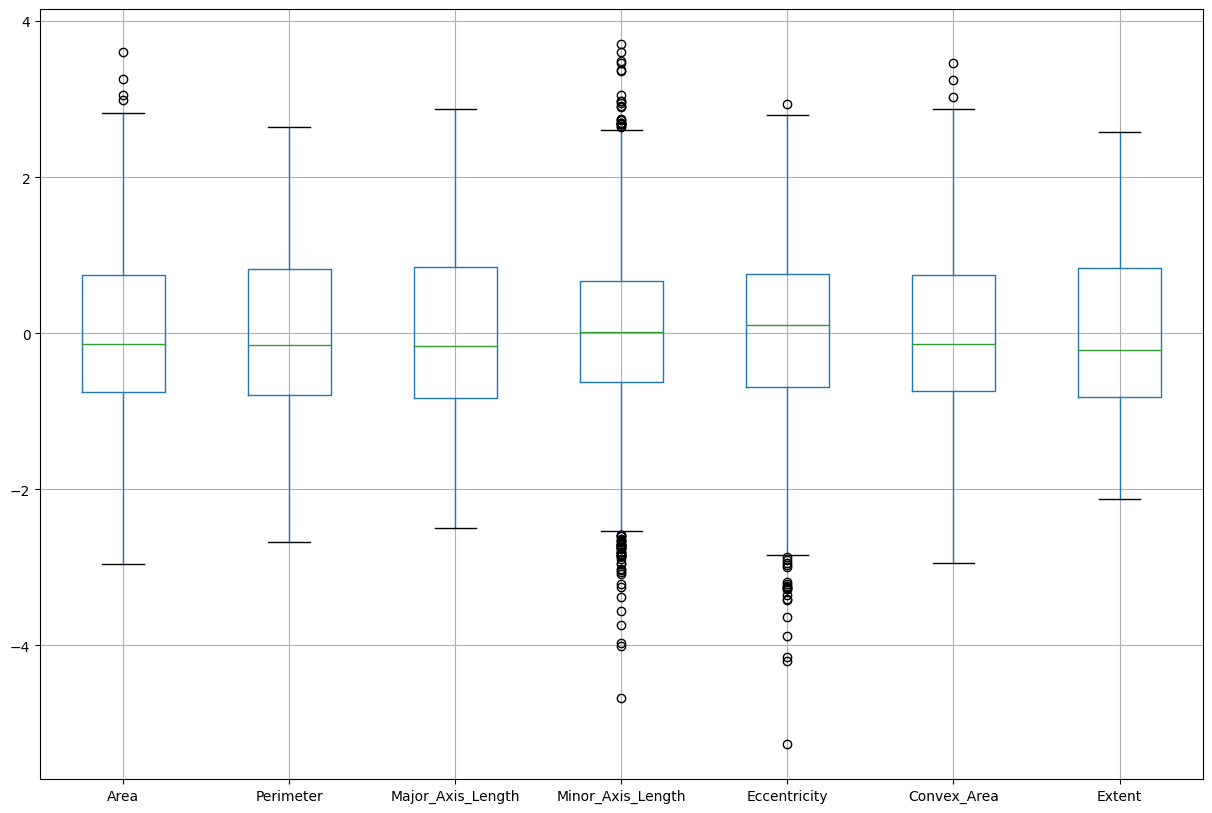

In [395]:
# Mostrando o gráfico boxplot para todos os atributos
data_normalized.boxplot(figsize=(15, 10))


Também, é possível visualizar se o conjunto suporta o processo de normalização por meio dos chamados Testes de Normalização.
Para tanto, deve-se considerar os seguintes resultados:

- _H0_: A amostra é proveniente de uma população com distribuição normal, com média e desvio-padrão desconhecidos.
- _H1_: A amostra não é proveniente de uma população com distribuição normal.

Os dois principais testes de normalização são: Teste de Shapiro-Wilk e Teste de Kolmogorov-Smirnov. Ambos podem ser acessados por meio da biblioteca _scipy.stats_.


### Seleção de Características


A seleção de características, ou _feature selection_, consistem em um conjunto de técnicas com o objetivo reduzir majoritariamente a dimensionalidade do _dataset_. Essas técnicas são dividas em: _brute-force_, _filter_, _wrapper_ e _embedded_. Também, vale ressaltar a importância deste processo para a obtenção de modelos mais simples e, desta forma, mais fáceis de serem interpretados e treinados por Redes Neurais.

Para exemplificar, a seguir são realizados três métodos de **Filtro de Correlação** da técnica _filter_.


#### Filtro de Correlação


A correlação busca entender, essencialmente, como uma variável se comporta em um cenário onde outra variável está mudando. Ou seja, trata-se de métodos estatísticos para se medir as relações entre as variáveis e busca identificar se existe alguma relação entre elas.

A seguir, são aplicados três tipos de métodos de Filtro de Correlação: de Pearson, de Kendall e de Spearman.


##### Coeficiente de Correlação de Pearson


O Coeficiente de Correlação de Pearson busca encontrar a força das **relações lineares** entre duas variáveis.


In [396]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Pearson")
data.corr(method='pearson', numeric_only=True)


Correlação de Pearson


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


<Axes: >

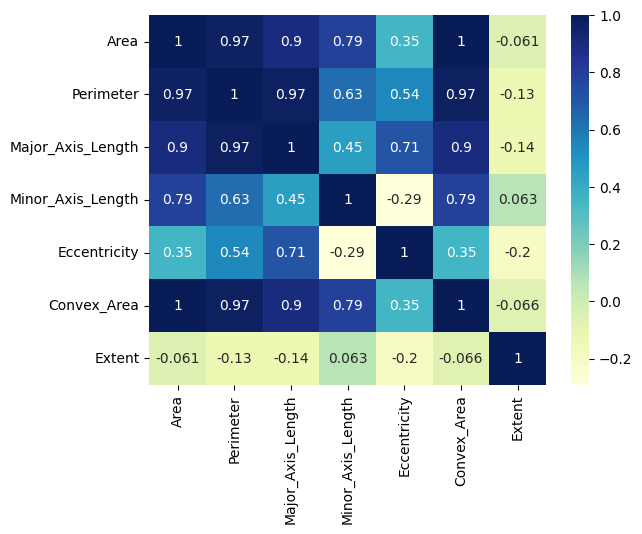

In [397]:
# Plotando o mapa de calor da correlação de Pearson
sbn.heatmap(data.corr(method='pearson', numeric_only=True),
            annot=True, cmap='YlGnBu')


##### Coeficiente de Correlação de Kendall


O Coeficiente de Correlação de Kendall busca medir a força da **associação ordinal** entre duas variáveis.


In [398]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Kendall")
data.corr(method='kendall', numeric_only=True)


Correlação de Kendall


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.844417,0.725665,0.578817,0.258053,0.972166,-0.057130
Perimeter,0.844417,1.000000,0.848094,0.441616,0.391114,0.852412,-0.105387
Major_Axis_Length,0.725665,0.848094,1.000000,0.305867,0.531673,0.724887,-0.117832
Minor_Axis_Length,0.578817,0.441616,0.305867,1.000000,-0.162460,0.579640,0.041863
Eccentricity,0.258053,0.391114,0.531673,-0.162460,1.000000,0.257234,-0.168744
Convex_Area,0.972166,0.852412,0.724887,0.579640,0.257234,1.000000,-0.059414
Extent,-0.057130,-0.105387,-0.117832,0.041863,-0.168744,-0.059414,1.000000


<Axes: >

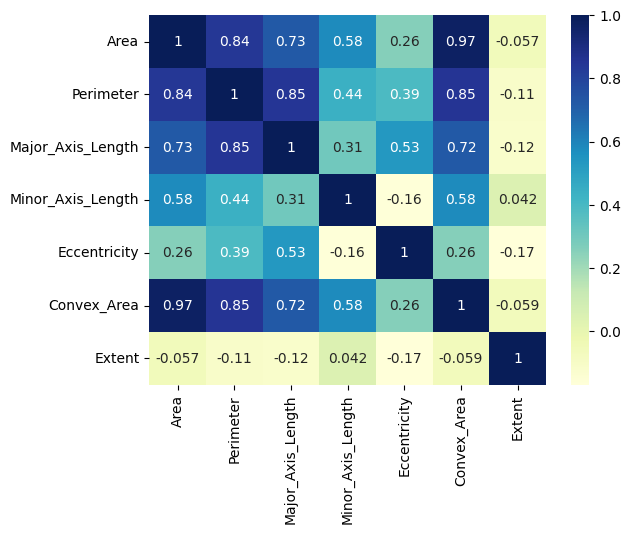

In [399]:
# Plotando o mapa de calor da correlação de Kendall
sbn.heatmap(data.corr(method='kendall', numeric_only=True),
            annot=True, cmap='YlGnBu')


##### Coeficiente de Correlação de Spearman


O Coeficiente de Correlação de Spearman busca encontrar a força das **relações monotônicas (lineares ou não)** entre duas variáveis.


In [400]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Spearman")
data.corr(method='spearman', numeric_only=True)


Correlação de Spearman


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.967234,0.903096,0.769569,0.397936,0.998934,-0.086025
Perimeter,0.967234,1.000000,0.969617,0.618936,0.572883,0.970462,-0.155711
Major_Axis_Length,0.903096,0.969617,1.000000,0.446606,0.732106,0.902782,-0.171433
Minor_Axis_Length,0.769569,0.618936,0.446606,1.000000,-0.232405,0.769941,0.062202
Eccentricity,0.397936,0.572883,0.732106,-0.232405,1.000000,0.397569,-0.233327
Convex_Area,0.998934,0.970462,0.902782,0.769941,0.397569,1.000000,-0.089460
Extent,-0.086025,-0.155711,-0.171433,0.062202,-0.233327,-0.089460,1.000000


<Axes: >

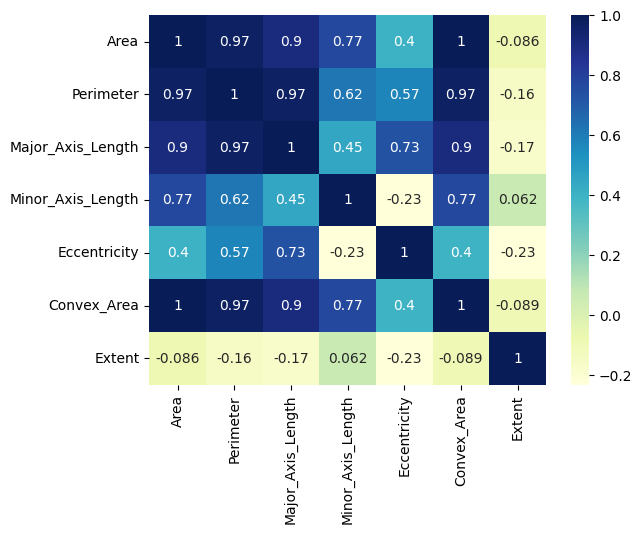

In [401]:
# Plotando o mapa de calor da correlação de Spearman
sbn.heatmap(data.corr(method='spearman', numeric_only=True),
            annot=True, cmap='YlGnBu')


#### _Principal Component Analysis_ (PCA)


O _Principal Component Analysis_ (PCA) é um dos principais métodos para reduzir a dimensionalidade do _dataset_, projetando os dados de seu espaço original de alta dimensão em um espaço de dimensão inferior. Os novos atributos, também chamados de componentes, criados pelo PCA devem ter as seguintes propriedades: são combinações lineares dos atributos originais; são ortogonais entre si; e capturam a quantidade máxima de variação nos dados.

O método do PCA é aplicado a partir dos seguintes passos, de forma ordenada: normalização; computação da matriz de covariância; cálculo dos vetores próprios e os valores próprios da matriz de covariância para identificar os componentes principais; calcular o vetor de características; e reformular os dados ao longo dos eixos de componentes principais.

Para fins exemplares, a aplicação do PCA para este _dataset_ é vista a seguir.


In [402]:
# Importação do método de normalização Z-Score automático
from sklearn.preprocessing import StandardScaler

# Importação do PCA
from sklearn.decomposition import PCA

# Antes de tudo, remove-se o atributo que define a classe
data_pca = data.drop(['Class'], axis=1)

# Primeiro: normalizar o conjunto de dados
data_pca_normalized = StandardScaler().fit_transform(data_pca)  # Z-Score
print('Dados Normalizados (Z-Score)')
print(data_pca_normalized)


Dados Normalizados (Z-Score)
[[ 1.47982953  2.0043543   2.34854657 ...  2.01833745  1.49965944
  -1.15292093]
 [ 1.14787029  1.12585309  0.98839042 ...  0.41001816  1.19291767
  -0.60207877]
 [ 1.13516924  1.31721425  1.45190846 ...  1.2129565   1.12650386
   0.405611  ]
 ...
 [-0.13320373 -0.32985087 -0.29824512 ... -0.27509915 -0.17306812
  -0.45573108]
 [-1.60825742 -1.74032002 -1.58097116 ... -0.59882134 -1.60715621
  -0.03716757]
 [-0.71225612 -1.39156605 -1.58754648 ... -2.93916013 -0.76628981
   1.82594692]]


In [403]:
# Definindo o número de componentes do PCA
n_components = 2  # 2 para colocar em gráfico X por Y

# Aplicando o PCA
pca = PCA(n_components=n_components)
projected_data = pca.fit_transform(data_pca_normalized)

# Mostrando os dados projetados com PCA
print('Dados Projetados com PCA')
print(projected_data)
print("\n")

# Segundo: mostrando a matriz de covariância do PCA
print('Variâncias')
print(pca.explained_variance_ratio_)
print("\n")

# Terceiro: mostrando os componentes do PCA
component_names = ['component {}'.format(
    i) for i in range(len(pca.components_))]
components_pca = pd.DataFrame(
    data=pca.components_, index=component_names, columns=data_pca.columns)
components_pca.head()


Dados Projetados com PCA
[[ 3.81262822 -2.16533103]
 [ 2.47715767  0.04529614]
 [ 2.63855553 -0.6216153 ]
 ...
 [-0.436684    0.10359442]
 [-3.58793323 -0.37570163]
 [-2.55608758  3.36123712]]


Variâncias
[0.65413989 0.21425124]




,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
component 0,0.461252,0.464408,0.447076,0.321752,0.227329,0.461694,-0.057716
component 1,0.124377,-0.055751,-0.213456,0.567105,-0.673152,0.122535,0.382232


<Axes: >

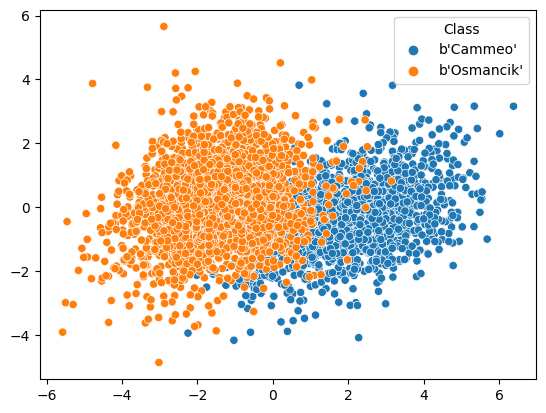

In [404]:
# Gráfico do PCA, com a dimensionalidade reduzida para 2
ins_class = data['Class']
sbn.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=ins_class)


---


# Conjunto Categórico: **_Car Evaluation_**


**Descrição do Dataset:** este conjunto contém informações sobre a avaliação de 1728 carros por meio dos atributos: preço, manutenção, portas, lugares, espaço no porta-malas e segurança. Além disso, como descrito na publicação, este _dataset_ não possui dados perdidos.

A descrição de cada atributo pode ser vista a seguir.

1. **Preço:** descreve o preço do carro, com base no mercado, e é representado por "alto", "mediano", "baixo" e "muito baixo";
2. **Manutenção:** indica o custo de manutenção do carro, com base no mercado, e é representado por "alto", "mediano", "baixo" e "muito baixo";
3. **Portas:** representa o número de portas do carro, podendo ser "2 portas" ou "4 portas";
4. **Lugares:** descreve a quantidade de passageiros que o carro pode levar, representado por "2 lugares" "4 lugares" e "mais de 4 lugares";
5. **Espaço no Porta-Malas:** indica o tamanho do porta-malas, com valores entre "pequeno", "médio" e "grande";
6. **Segurança:** avalia o nível de segurança do carro, sendo representado por "baixa", "média" e "alta".

Especificamente, os carros podem ser classificados em quatro tipos: "inaceitável", "aceitável", "bom" e "muito bom". Comumente, este conjunto de dados é utilizado para tarefas de classificação, cujo objetivo consiste em prever a classe de avaliação com base nos atributos fornecidos.

Este conjunto de dados pode ser acessado por meio de: [Car Evaluation](https://archive.ics.uci.edu/dataset/19/car+evaluation) (última data de acesso: 15 de set. de 2023).


## <strong> Informações Básicas </strong>


In [405]:
# Recuperando dados a partir do arquivo e definindo nome dos atributos
data = pd.read_csv('./Datasets/02_00_car.data')
data.columns = ['Buying', 'Maint', 'Doors',
                'Persons', 'Lug_Boot', 'Safety', 'Class']

# Mostra os 5 primeiros e últimos registros
data


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [406]:
# Mostra os 5 primeiros registros, formatados
data.head()


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [407]:
# Mostra os 5 últimos registros, formatados
data.tail()


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [408]:
# Mostra a quantidade de linhas e colunas da tabela (tupla)
data.shape


(1727, 7)

In [409]:
# Mostra as informações dos atributos e outras do dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1727 non-null   object
 1   Maint     1727 non-null   object
 2   Doors     1727 non-null   object
 3   Persons   1727 non-null   object
 4   Lug_Boot  1727 non-null   object
 5   Safety    1727 non-null   object
 6   Class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## <strong> Exploração dos Dados </strong>


### Dados Simples: Média, Desvio-Padrão, Mínimo, Mediana, Máximo


Diferentemente do primeiro _dataset_, este conjunto possui somente atributos categóricos e, portanto, para se calcular as métricas estatísticas acima (e outras) deve-se realizar a conversão dos atributos categóricos para numéricos. Este processo de conversão é denominado de **Encodificação**. Para termos práticos, isso será abordado na seção de **Pré-Processamento**.


### Quantidade de Dados de Cada Classe


In [410]:
# Retornar a quantidade de classes do dataset por meio da coluna "Class"
# Nota: o nome da coluna deve ser exatamente igual ao do dataset (case-sensitive)
data['Class'].value_counts()


Class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

Quando está no contexto de atributos categóricos, uma análise mais recorrente consiste em análise a quantidade de dados (frequência) por atributo, conforme indicado a seguir. Nestas tabelas é indicado a quantidade de classes por atributo, o que indica a recorrência dos mesmos para cada atributo.


In [411]:
# Tabela de frequência dupla absoluta do atributos categórico 'Buying'
freq_table = pd.crosstab(
    index=data['Buying'], columns=data['Class'], margins=True)
freq_table


Class,acc,good,unacc,vgood,All
Buying,,,,,
high,108,0,324,0,432
low,89,46,258,39,432
med,115,23,268,26,432
vhigh,72,0,359,0,431
All,384,69,1209,65,1727


No exemplo acima, uma interpretação possível é a seguinte: da classe de carros "aceitos", 108 são de valor "alto" e 115 de valor "médio"; ao passo que da classe "boa" não há nenhum carro de valor "alto", mas há 23 de valor "médio". A partir desta interpretação, pode-se afirmar inicialmente que os carros "aceitos" são, quando comparados aos carros "bons", em maior quantidade com valores "alto" e "médio".

Também, é possível criar a tabela de frequência acima com os percentuais.


In [412]:
# Tabela de frequência dupla percentual do atributos categórico 'Buying'
freq_table = pd.crosstab(
    index=data['Buying'], columns=data['Class'], margins=True, normalize='all')
freq_table


Class,acc,good,unacc,vgood,All
Buying,,,,,
high,0.062536,0.000000,0.187609,0.000000,0.250145
low,0.051534,0.026636,0.149392,0.022583,0.250145
med,0.066589,0.013318,0.155182,0.015055,0.250145
vhigh,0.041691,0.000000,0.207875,0.000000,0.249566
All,0.222351,0.039954,0.700058,0.037638,1.000000


### Dados Estatísticos Completos Para Cada Atributo


Neste primeiro caso, são incluídos tanto os dados estatísticos básicos, como média e desvio padrão, quanto alguns dos mais avançados, como os percentis (25%, 50% e 75%). Vale ressaltar que, neste caso, há a análise para cada atributo separadamente, ou seja, dados como covariância, a qual relaciona os atributos entre si, não são mostrados.


In [413]:
# Retornar, para cada atributo (coluna), a descrição estatística completa
# Incluem: média, frequência, mínimo, percentis (25, 50 e 75), dentre outros, quando cabível
data.describe(include='all')


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


É possível inferir, por exemplo, que a classe "não aceitável" é a mais recorrente com a existência de 1209 registros do total de 1727 deste _dataset_.


## <strong> Pré-Processamento dos Dados </strong>


O pré-processamento consiste na aplicação de diversas técnicas para limpar, selecionar e transformar os dados para melhorar a análise dos mesmos. Algumas técnicas: Agregação, _Sampling_, **_Feature Selection_**, **Redução da Dimensionalidade**, **_Feature Creation_**, Discretização/Binarização, dentre outras.


### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Não é incomum que um dado não tenha um ou mais valores de atributos, devido a informações não coletadas ou, até mesmo, esses atributos não se aplicarem às instâncias de dados. Contudo, independente do motivo em que há a falta de dados, é necessário realizar um tratamento para evitar problemas de análise. O tratamento para os chamados "dados perdidos" (ou inexistentes) pode ser realizado de duas principais formas: substituir os valores pela mediana daquele atributo; ou simplesmente descartar aquele dado.


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [414]:
# Substituindo os dados faltantes '?' por 'np.NaN' para ser possível analisar
data = data.replace('?', np.NaN)

print('Número de Instâncias = {0}'.format(data.shape[0]))
print('Número de Atributos = {0}'.format(data.shape[1]))

# Mostrando a quantidade total de dados inválidos, por atributo
print('Número de Dados Perdidos:')
for col in data.columns:
    print('\t{0}: {1}'.format(col, data[col].isna().sum()))


Número de Instâncias = 1727
Número de Atributos = 7
Número de Dados Perdidos:
	Buying: 0
	Maint: 0
	Doors: 0
	Persons: 0
	Lug_Boot: 0
	Safety: 0
	Class: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Conversão de Dados Categóricos para Discretos: Encodificação


Quando trabalha-se com valores categóricos e deseja-se realizar operações estatísticas mais comuns, como média e desvio-padrão, é necessário a conversão destes dados categóricos para numéricos. Além dessas operações básicas, como será visto a seguir, os tratamentos recorrentes no pré-processamento e futuramente na aplicação de Redes Neurais normalmente exigem o uso de dados somente numéricos.

Existem vários métodos para realizar a conversão de dados categóricos para discretos: _One Hot Encoding_, _Dummy Encoding_, _Label Encoding_, _Binary Encoding_, dentre outros. Para fins de exemplificação, a seguir é aplicado o _One Hot Encoding_ para este _dataset_.


In [415]:
# Utilização do One Hot Encoder para conversão
# from sklearn.preprocessing import OneHotEncoder

# Aplicando o One Hot Encoder em todos os atributos
# data_encoded = pd.DataFrame(OneHotEncoder(handle_unknown='ignore', sparse_output=False).fit_transform(data[cols]))

# Aplicando o One Hot Encoder em todos os atributos
data_encoded = pd.get_dummies(data=data, columns=data.columns)
print(data_encoded)
data_encoded.info()


      Buying_high  Buying_low  Buying_med  Buying_vhigh  Maint_high  \
0           False       False       False          True       False   
1           False       False       False          True       False   
2           False       False       False          True       False   
3           False       False       False          True       False   
4           False       False       False          True       False   
...           ...         ...         ...           ...         ...   
1722        False        True       False         False       False   
1723        False        True       False         False       False   
1724        False        True       False         False       False   
1725        False        True       False         False       False   
1726        False        True       False         False       False   

      Maint_low  Maint_med  Maint_vhigh  Doors_2  Doors_3  ...  Lug_Boot_big  \
0         False      False         True     True    False  ...     

Como mostra acima, cada atirbuto de cada classe virou um valor binário _True_ ou _False_.


In [416]:
# Percorrer cada atributo (coluna) e mostrar os dados estatísticos básicos de cada um
print('Média')
print(data_encoded.mean())
print('\n')

print('Desvio-Padrão')
print(data_encoded.std())


Média
Buying_high       0.250145
Buying_low        0.250145
Buying_med        0.250145
Buying_vhigh      0.249566
Maint_high        0.250145
Maint_low         0.250145
Maint_med         0.250145
Maint_vhigh       0.249566
Doors_2           0.249566
Doors_3           0.250145
Doors_4           0.250145
Doors_5more       0.250145
Persons_2         0.332947
Persons_4         0.333526
Persons_more      0.333526
Lug_Boot_big      0.333526
Lug_Boot_med      0.333526
Lug_Boot_small    0.332947
Safety_high       0.333526
Safety_low        0.332947
Safety_med        0.333526
Class_acc         0.222351
Class_good        0.039954
Class_unacc       0.700058
Class_vgood       0.037638
dtype: float64


Desvio-Padrão
Buying_high       0.433222
Buying_low        0.433222
Buying_med        0.433222
Buying_vhigh      0.432887
Maint_high        0.433222
Maint_low         0.433222
Maint_med         0.433222
Maint_vhigh       0.432887
Doors_2           0.432887
Doors_3           0.433222
Doors_4           

<Axes: >

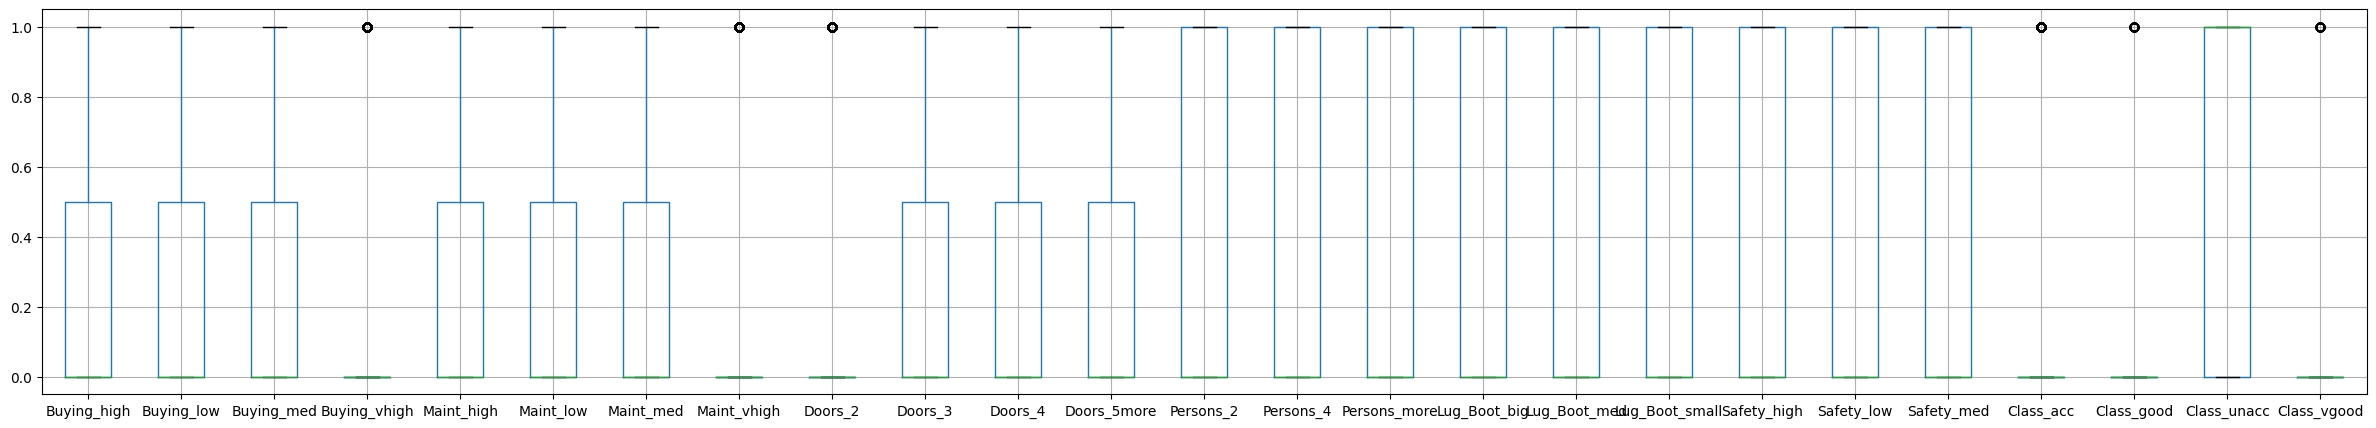

In [417]:
# Gráfico de boxplot para os dados encodificados
data_encoded.boxplot(figsize=(30, 5))


### Amostragem


A amostragem, ou _sampling_, é a principal técnica empregada para reduzir dados nos _datasets_ e é utilizada frequentemente para realizar uma investigação preliminar dos dados e a análise final dos mesmos. Ainda que existam vários métodos disponíveis desta técnica, dois são mais recorrentes: amostragem sem substituição, em que cada dado selecionado é removido do conjunto original; e a amostragem com substituição, em que cada dado selecionado não é removido e pode ser selecionado mais de uma vez posteriormente.

O código abaixo exemplifica esta técnica por meio do método de amostragem sem substituição.


In [418]:
# Copiando o dataset original para exemplificar
data_sampling = cp(data)

# Realizando uma amostragem com 10 dados selecionados aleatoriamente
sample = data_sampling.sample(n=10)
sample


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
1068,med,high,5more,4,big,med,acc
507,high,vhigh,4,more,med,med,unacc
580,high,high,3,4,med,high,acc
131,vhigh,high,2,more,big,low,unacc
243,vhigh,med,3,2,small,med,unacc
430,vhigh,low,5more,more,big,high,acc
1232,med,low,3,more,small,low,unacc
792,high,low,3,4,small,med,unacc
574,high,high,3,2,big,high,unacc
625,high,high,5more,2,med,high,unacc


In [419]:
# Também, é possível realizar a amostragem por meio da seleção percentual de dados desejados
# Seleção de 1% dos dados
sample = data_sampling.sample(frac=0.01, random_state=42)
sample


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
599,high,high,4,2,big,low,unacc
932,med,vhigh,4,4,big,low,unacc
628,high,high,5more,2,big,high,unacc
1497,low,high,5more,4,med,med,acc
1262,med,low,4,more,med,low,unacc
930,med,vhigh,4,4,med,med,acc
23,vhigh,vhigh,2,more,big,low,unacc
843,high,low,5more,2,big,med,unacc
963,med,vhigh,5more,more,small,med,unacc
839,high,low,5more,2,med,low,unacc


Já abaixo, é possível visualizar a aplicação de amostragem com substituição.


In [420]:
# Realização de amostragem com substituição e por meio de seleção percentual
sample = data_sampling.sample(frac=0.01, random_state=42, replace=True)
sample


,Buying,Maint,Doors,Persons,Lug_Boot,Safety,Class
1126,med,med,3,more,small,high,acc
1459,low,high,4,2,small,high,unacc
860,high,low,5more,more,big,low,unacc
1294,med,low,5more,more,big,high,vgood
1130,med,med,3,more,big,low,unacc
1095,med,med,2,4,big,med,acc
1724,low,low,5more,more,big,low,unacc
1044,med,high,4,more,small,med,unacc
1638,low,low,2,more,small,med,unacc
121,vhigh,high,2,4,med,high,unacc


### Normalização e Testes de Normalidade


A normalização é um processo crucial para a análise de dados, uma vez que é responsável por tratar as questões relacionadas com a **magnitude** das características. Em outras palavras, a escala de cada variável influencia diretamente o coeficiente de regressão e, desta forma, as variáveis com uma magnitude mais significativa predominam sobre as que têm um intervalo de magnitude menor. Em termos práticos, quando aplicados em Redes Neurais, essa diferença significativa de magnitude dos atributos afeta negativamente a convergência do gradiente descendente, tornando o processo de treinamento mais lento. Grande parte dos algoritmos de classificação são sensíveis à magnitude, como: Redes Neurais, SVMs, KNN, K-Means, PCA, dentre outros.

Neste cenário, alguns métodos de normalização são bastante utilizados, como o _Standardization_ (_Z-Score_) e o _Normalization_. O _Standardization_ redimensiona a distribuição de valores para que a média dos valores observados seja 0 e o desvio padrão seja 1. Este método preserva a forma da distribuição original e os _outliers_. Já o _Normalization_ subtrai o valor mínimo de todas as variáveis e, em seguida, divide-o pelo intervalo de valores, comprimindo o valor final entre 0 e 1. Neste método, a forma da distribuição original é perdida e os valores estão contidos entre o intervalo [0, 1], sendo bem sensível aos _outliers_.

Contudo, para atributos categóricos, este processo foi dado anteriormente com a **Encodificação**, uma vez que transforma os valores categóricos em discretos e, desta forma, sendo possíveis de processamento para os algoritmos de classificação, por exemplo.


### Seleção de Características


A seleção de características, ou _feature selection_, consistem em um conjunto de técnicas com o objetivo reduzir majoritariamente a dimensionalidade do _dataset_. Essas técnicas são dividas em: _brute-force_, _filter_, _wrapper_ e _embedded_. Também, vale ressaltar a importância deste processo para a obtenção de modelos mais simples e, desta forma, mais fáceis de serem interpretados e treinados por Redes Neurais.

Para exemplificar, a seguir são realizados três métodos de **Filtro de Correlação** da técnica _filter_.


#### Filtro de Correlação


A correlação busca entender, essencialmente, como uma variável se comporta em um cenário onde outra variável está mudando. Ou seja, trata-se de métodos estatísticos para se medir as relações entre as variáveis e busca identificar se existe alguma relação entre elas.

A seguir, são aplicados três tipos de métodos de Filtro de Correlação: de Pearson, de Kendall e de Spearman.


##### Coeficiente de Correlação de Pearson


O Coeficiente de Correlação de Pearson busca encontrar a força das **relações lineares** entre duas variáveis.


In [421]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Pearson")
data_encoded.corr(method='pearson', numeric_only=True)


Correlação de Pearson


,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maint_high,Maint_low,Maint_med,Maint_vhigh,Doors_2,Doors_3,...,Lug_Boot_big,Lug_Boot_med,Lug_Boot_small,Safety_high,Safety_low,Safety_med,Class_acc,Class_good,Class_unacc,Class_vgood
Buying_high,1.000000,-0.333591,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.038404,-0.117825,0.062949,-0.114222
Buying_low,-0.333591,1.000000,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.022685,0.196194,-0.129618,0.159752
Buying_med,-0.333591,-0.333591,1.000000,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Buying_vhigh,-0.333076,-0.333076,-0.333076,1.000000,0.000580,0.000580,0.000580,-0.001740,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Maint_high,-0.000193,-0.000193,-0.000193,0.000580,1.000000,-0.333591,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.028758,-0.117825,0.033772,-0.022897
Maint_low,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,1.000000,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.013040,0.196194,-0.100441,0.068427
Maint_med,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,-0.333591,1.000000,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Maint_vhigh,0.000580,0.000580,0.000580,-0.001740,-0.333076,-0.333076,-0.333076,1.000000,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Doors_2,0.000580,0.000580,0.000580,-0.001740,0.000580,0.000580,0.000580,-0.001740,1.000000,-0.333076,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.047729,-0.015167,0.067962,-0.043741
Doors_3,-0.000193,-0.000193,-0.000193,0.000580,-0.000193,-0.000193,-0.000193,0.000580,-0.333076,1.000000,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.009467,0.005052,-0.007075,-0.008847


<Axes: >

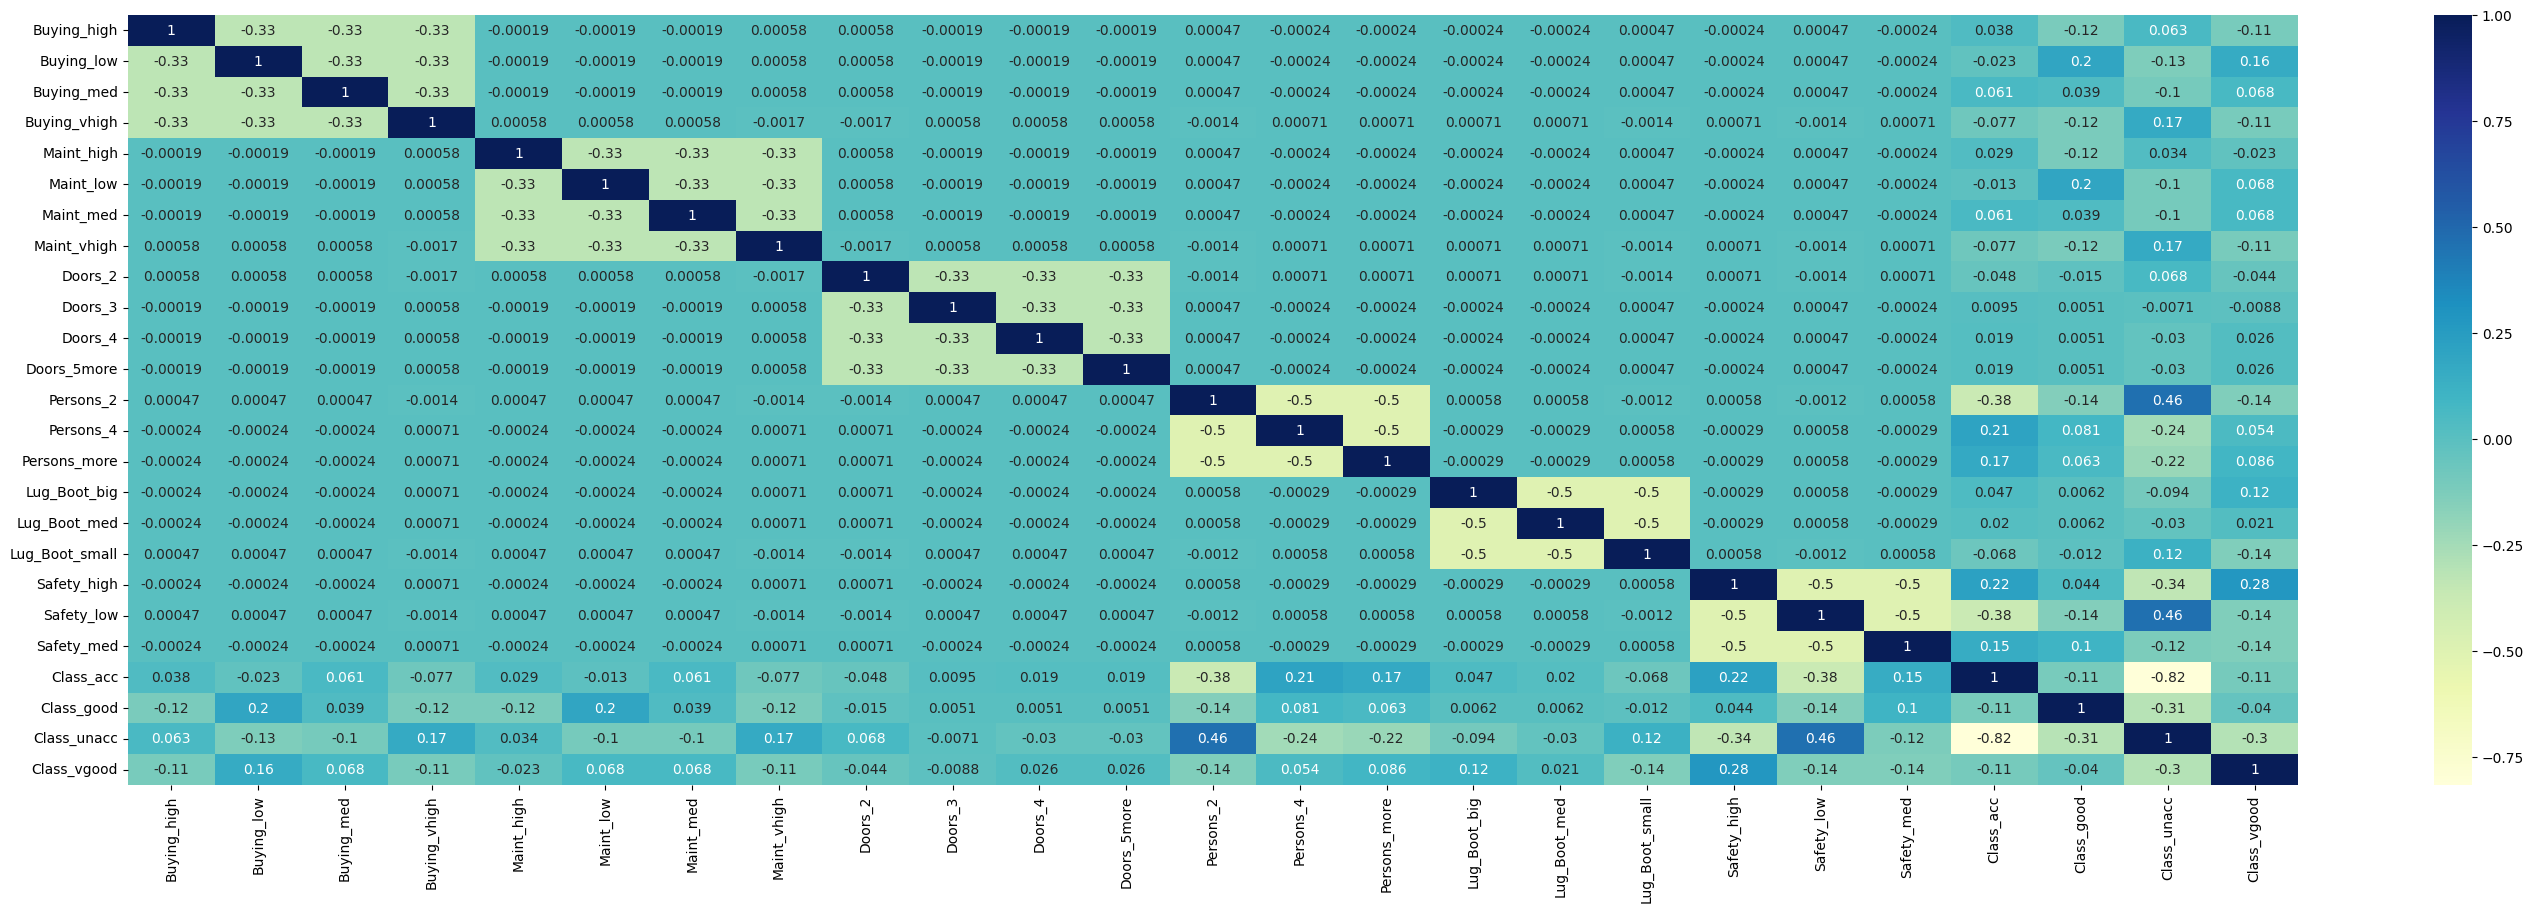

In [422]:
# Plotando o mapa de calor da correlação de Pearson
plt.figure(figsize=(35, 10))
sbn.heatmap(data_encoded.corr(method='pearson', numeric_only=True),
            annot=True, cmap='YlGnBu', )


##### Coeficiente de Correlação de Kendall


O Coeficiente de Correlação de Kendall busca medir a força da **associação ordinal** entre duas variáveis.


In [423]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Kendall")
data_encoded.corr(method='kendall', numeric_only=True)


Correlação de Kendall


,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maint_high,Maint_low,Maint_med,Maint_vhigh,Doors_2,Doors_3,...,Lug_Boot_big,Lug_Boot_med,Lug_Boot_small,Safety_high,Safety_low,Safety_med,Class_acc,Class_good,Class_unacc,Class_vgood
Buying_high,1.000000,-0.333591,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.038404,-0.117825,0.062949,-0.114222
Buying_low,-0.333591,1.000000,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.022685,0.196194,-0.129618,0.159752
Buying_med,-0.333591,-0.333591,1.000000,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Buying_vhigh,-0.333076,-0.333076,-0.333076,1.000000,0.000580,0.000580,0.000580,-0.001740,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Maint_high,-0.000193,-0.000193,-0.000193,0.000580,1.000000,-0.333591,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.028758,-0.117825,0.033772,-0.022897
Maint_low,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,1.000000,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.013040,0.196194,-0.100441,0.068427
Maint_med,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,-0.333591,1.000000,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Maint_vhigh,0.000580,0.000580,0.000580,-0.001740,-0.333076,-0.333076,-0.333076,1.000000,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Doors_2,0.000580,0.000580,0.000580,-0.001740,0.000580,0.000580,0.000580,-0.001740,1.000000,-0.333076,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.047729,-0.015167,0.067962,-0.043741
Doors_3,-0.000193,-0.000193,-0.000193,0.000580,-0.000193,-0.000193,-0.000193,0.000580,-0.333076,1.000000,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.009467,0.005052,-0.007075,-0.008847


<Axes: >

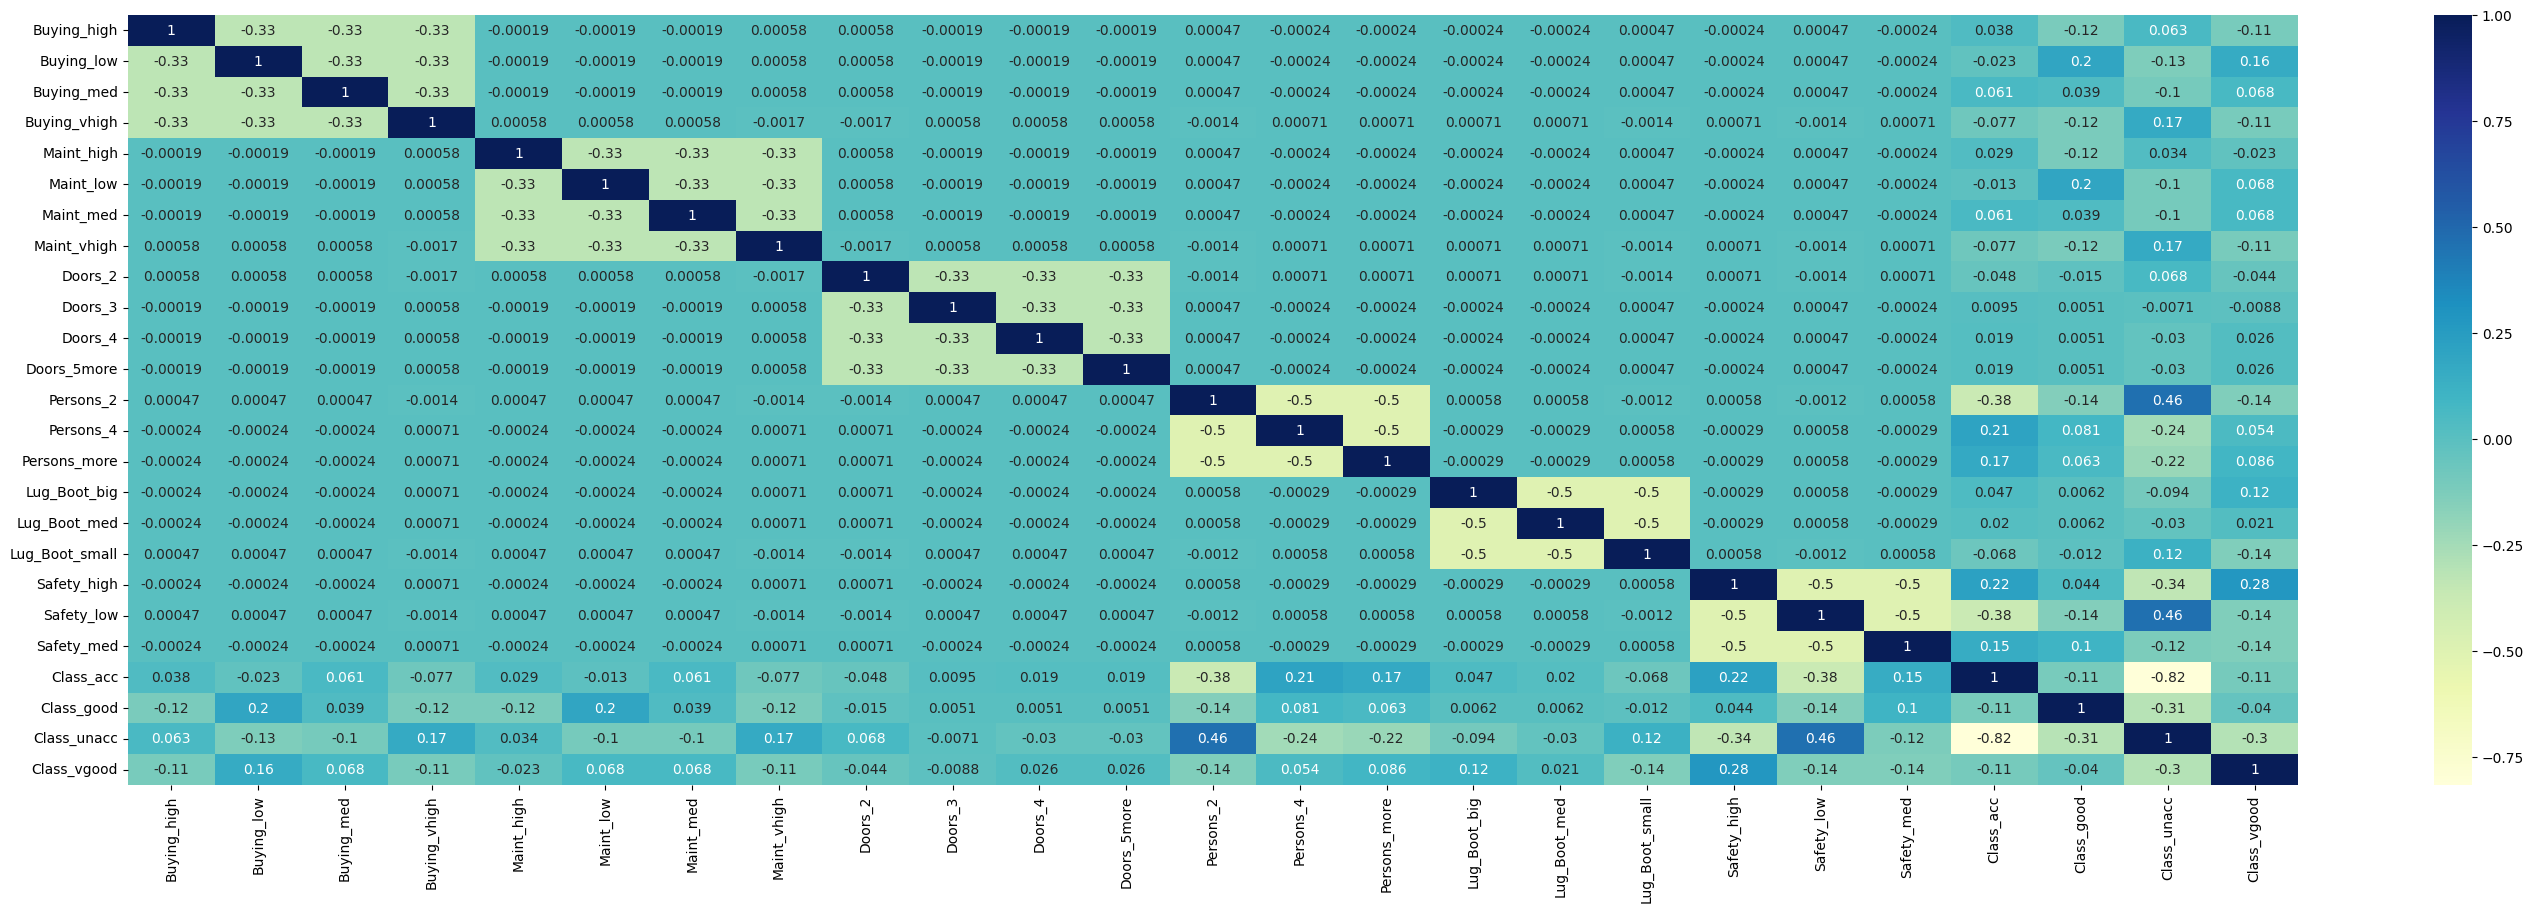

In [424]:
# Plotando o mapa de calor da correlação de Kendall
plt.figure(figsize=(35, 10))
sbn.heatmap(data_encoded.corr(method='kendall', numeric_only=True),
            annot=True, cmap='YlGnBu')


##### Coeficiente de Correlação de Spearman


O Coeficiente de Correlação de Spearman busca encontrar a força das **relações monotônicas (lineares ou não)** entre duas variáveis.


In [425]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Spearman")
data_encoded.corr(method='spearman', numeric_only=True)


Correlação de Spearman


,Buying_high,Buying_low,Buying_med,Buying_vhigh,Maint_high,Maint_low,Maint_med,Maint_vhigh,Doors_2,Doors_3,...,Lug_Boot_big,Lug_Boot_med,Lug_Boot_small,Safety_high,Safety_low,Safety_med,Class_acc,Class_good,Class_unacc,Class_vgood
Buying_high,1.000000,-0.333591,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.038404,-0.117825,0.062949,-0.114222
Buying_low,-0.333591,1.000000,-0.333591,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.022685,0.196194,-0.129618,0.159752
Buying_med,-0.333591,-0.333591,1.000000,-0.333076,-0.000193,-0.000193,-0.000193,0.000580,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Buying_vhigh,-0.333076,-0.333076,-0.333076,1.000000,0.000580,0.000580,0.000580,-0.001740,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Maint_high,-0.000193,-0.000193,-0.000193,0.000580,1.000000,-0.333591,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.028758,-0.117825,0.033772,-0.022897
Maint_low,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,1.000000,-0.333591,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,-0.013040,0.196194,-0.100441,0.068427
Maint_med,-0.000193,-0.000193,-0.000193,0.000580,-0.333591,-0.333591,1.000000,-0.333076,0.000580,-0.000193,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.060911,0.039184,-0.100441,0.068427
Maint_vhigh,0.000580,0.000580,0.000580,-0.001740,-0.333076,-0.333076,-0.333076,1.000000,-0.001740,0.000580,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.076689,-0.117644,0.167239,-0.114045
Doors_2,0.000580,0.000580,0.000580,-0.001740,0.000580,0.000580,0.000580,-0.001740,1.000000,-0.333076,...,0.000710,0.000710,-0.001420,0.000710,-0.001420,0.000710,-0.047729,-0.015167,0.067962,-0.043741
Doors_3,-0.000193,-0.000193,-0.000193,0.000580,-0.000193,-0.000193,-0.000193,0.000580,-0.333076,1.000000,...,-0.000236,-0.000236,0.000473,-0.000236,0.000473,-0.000236,0.009467,0.005052,-0.007075,-0.008847


<Axes: >

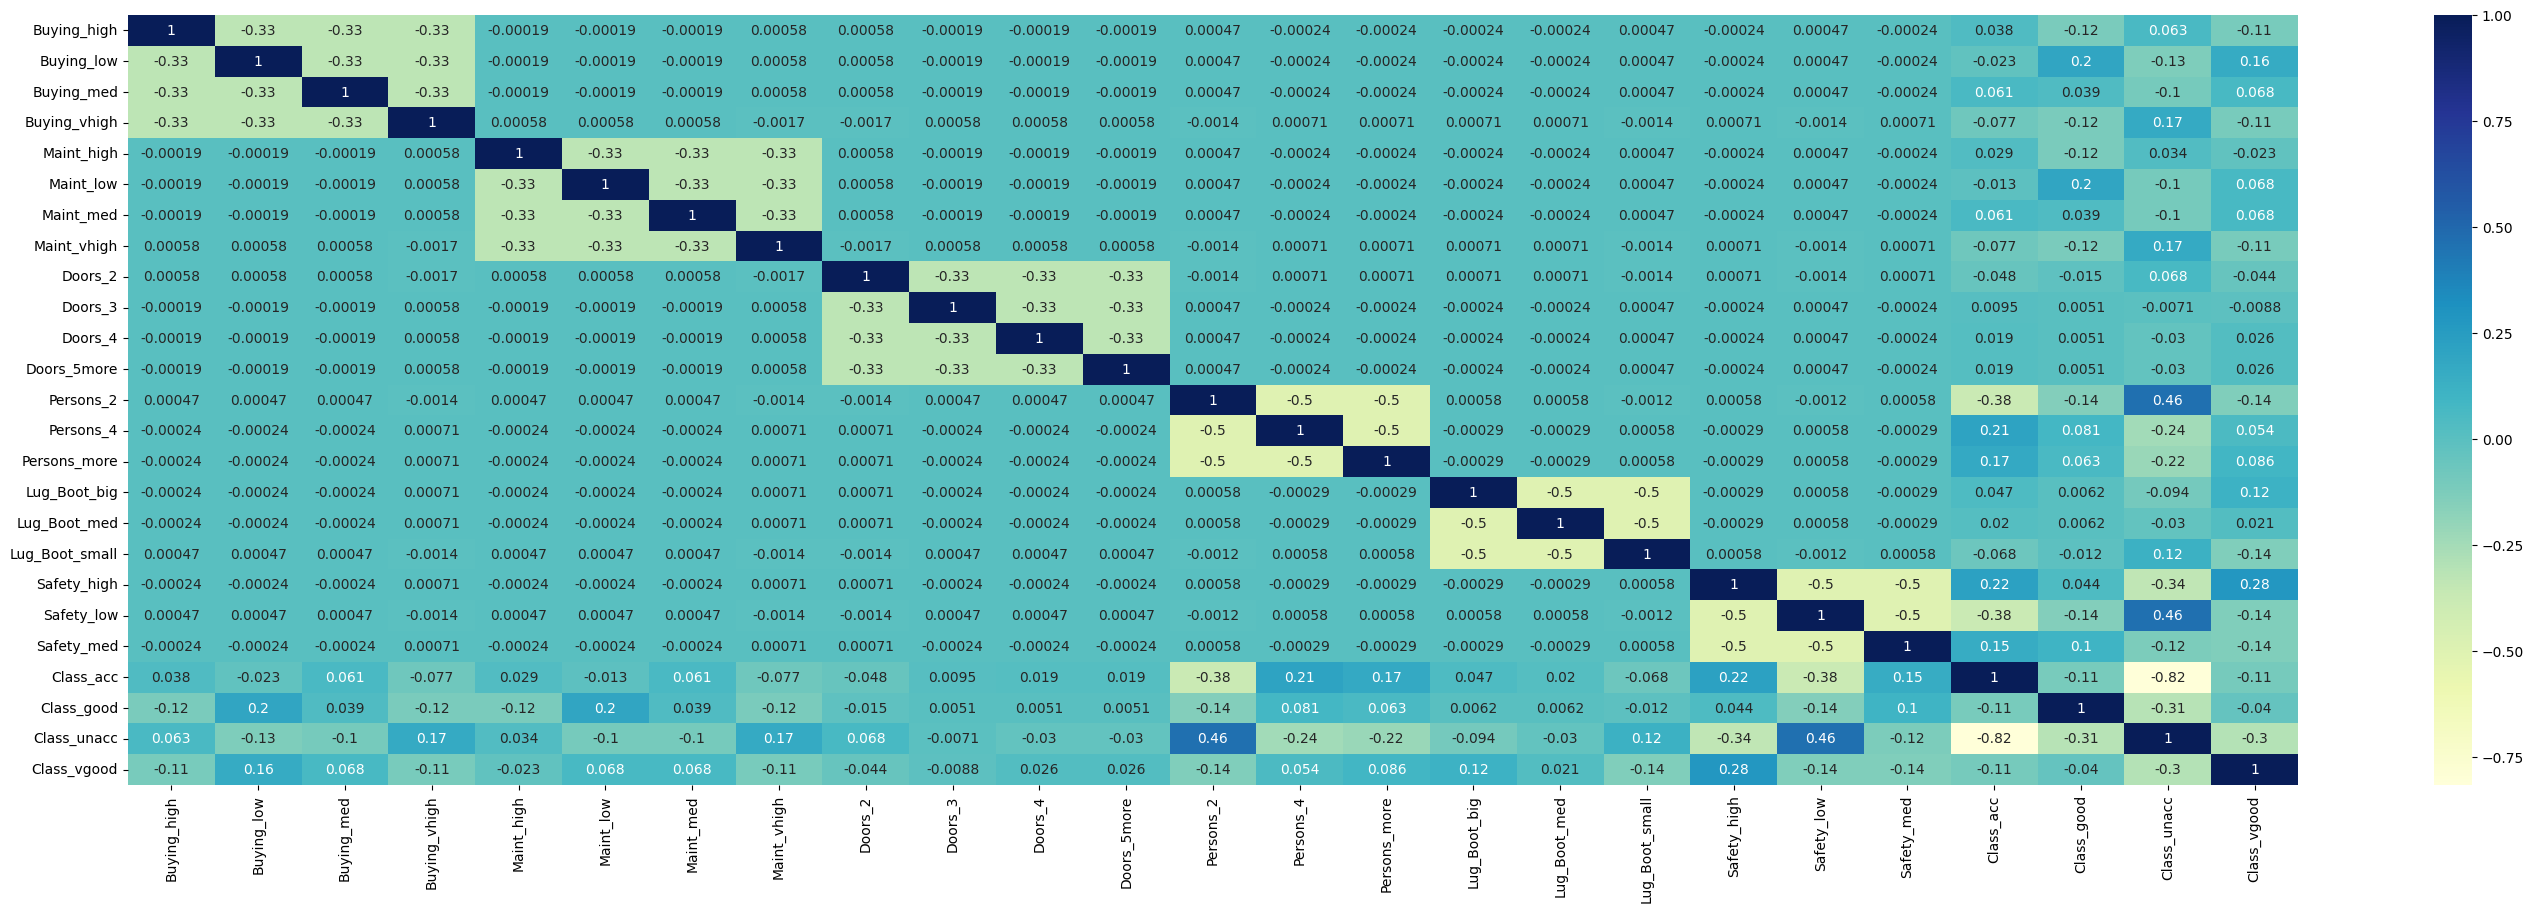

In [426]:
# Plotando o mapa de calor da correlação de Spearman
plt.figure(figsize=(35, 10))
sbn.heatmap(data_encoded.corr(method='spearman', numeric_only=True),
            annot=True, cmap='YlGnBu')


#### _Principal Component Analysis_ (PCA)


O _Principal Component Analysis_ (PCA) é um dos principais métodos para reduzir a dimensionalidade do _dataset_, projetando os dados de seu espaço original de alta dimensão em um espaço de dimensão inferior. Os novos atributos, também chamados de componentes, criados pelo PCA devem ter as seguintes propriedades: são combinações lineares dos atributos originais; são ortogonais entre si; e capturam a quantidade máxima de variação nos dados.

O método do PCA é aplicado a partir dos seguintes passos, de forma ordenada: normalização; computação da matriz de covariância; cálculo dos vetores próprios e os valores próprios da matriz de covariância para identificar os componentes principais; calcular o vetor de características; e reformular os dados ao longo dos eixos de componentes principais.

Contudo, ainda que seja possível utilizar o PCA em dados binários, como no _dataset_ atual aplicado com o _One Hot Encoding_, não é recomendado, tendo em vista que o PCA é designado, majoritariamente, para **variáveis contínuas**.


---


# Conjunto Misto (Numérico e Categórico): **_Abalone_**


**Descrição do Dataset:** este conjunto apresenta um problema de previsão (regressão) da idade de um abalone (espécie de molusco marinho) a partir de medições físicas, as quais são os atributos deste conjunto de dados.

A descrição de cada atributo pode ser vista a seguir.

1. **Sexo (categórico):** descreve o sexo do abalone, podendo ser "M" para masculino, "F" para feminino e "I" para infantil;
2. **Comprimento da Concha (decimal):** representa o comprimento médio da concha, em milímetros;
3. **Diâmetro (decimal):** representa o diâmetro médio da concha, em milímetros;
4. **Altura (decimal):** representa a altura da concha, em milímetros;
5. **Peso Integral (decimal):** representa o peso integral do abalone, incluindo a carne e a concha, em gramas;
6. **Peso da Carne (decimal):** representa o peso da carne do abalone, em gramas;
7. **Peso das Vísceras (decimal):** representa o peso das vísceras (órgãos internos), em gramas;
8. **Peso da Concha (decimal):** representa o peso da concha, em gramas;
9. **Anéis (inteiro):** representa a quantidade de anéis do abalone e, a partir deste atributo, é possível encontrar a idade, em anos, acrescendo com o valor de _1,5_.

Por se tratar de um problema com foco em regressão, há diversas classes (atributo _Anéis_). Além disso, no que diz respeito às análises que são vistas nas seções a seguir, é importante ressaltar que este conjunto é do tipo misto, tendo em vista a existência de um ou mais atributos numéricos juntamente com um ou mais atributos categóricos. Desta forma, é possível seguir as análises de duas formas abrangentes: realizar a **Encodificação** dos dados categóricos para numéricos, ou realizar a **Discretização** dos dados numéricos para categóricos. Será majoritariamente utilizado a **Encodificação**, mas haverá exemplos com a **Discretização**.

Este conjunto de dados pode ser acessado por meio de: [Abalone](https://archive.ics.uci.edu/dataset/1/abalone) (última data de acesso: 15 de set. de 2023).


## <strong> Informações Básicas </strong>


In [427]:
# Recuperando dados a partir do arquivo e definindo nome dos atributos
data = pd.read_csv('./Datasets/03_00_abalone.data')
data.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_Weight',
                'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight', 'Rings']

# Mostra os 5 primeiros e últimos registros
data


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [428]:
# Mostra os 5 primeiros registros, formatados
data.head()


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [429]:
# Mostra os 5 últimos registros, formatados
data.tail()


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4175,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [430]:
# Mostra a quantidade de linhas e colunas da tabela (tupla)
data.shape


(4176, 9)

In [431]:
# Mostra as informações dos atributos e outras do dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole_Weight    4176 non-null   float64
 5   Shucked_Weight  4176 non-null   float64
 6   Viscera_Weight  4176 non-null   float64
 7   Shell_Weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## <strong> Exploração dos Dados </strong>


### Dados Simples: Média, Desvio-Padrão, Mínimo, Mediana, Máximo


Como explicado nos outros _datasets_, somente os atributos numéricos são possíveis de cálculo das métricas acima. Já os categóricos, deve-se realizar a **Encodificação**.


In [432]:
import pandas.api.types as pd_types  # Identificar o tipo de dado do dataset

# Percorrer cada atributo (coluna) e mostrar os dados estatísticos básicos de cada um
for col in data.columns:
    if pd_types.is_numeric_dtype(data[col]):
        print(f'{col}')
        print('\t Média = {:.2f}'.format(data[col].mean()))
        print('\t Desvio-Padrão = {:.2f}'.format(data[col].std()))
        print('\t Mínimo = {:.2f}'.format(data[col].min()))
        print('\t Mediana = {:.2f}'.format(data[col].median()))
        print('\t Máximo = {:.2f}'.format(data[col].max()))


Length
	 Média = 0.52
	 Desvio-Padrão = 0.12
	 Mínimo = 0.07
	 Mediana = 0.55
	 Máximo = 0.81
Diameter
	 Média = 0.41
	 Desvio-Padrão = 0.10
	 Mínimo = 0.06
	 Mediana = 0.42
	 Máximo = 0.65
Height
	 Média = 0.14
	 Desvio-Padrão = 0.04
	 Mínimo = 0.00
	 Mediana = 0.14
	 Máximo = 1.13
Whole_Weight
	 Média = 0.83
	 Desvio-Padrão = 0.49
	 Mínimo = 0.00
	 Mediana = 0.80
	 Máximo = 2.83
Shucked_Weight
	 Média = 0.36
	 Desvio-Padrão = 0.22
	 Mínimo = 0.00
	 Mediana = 0.34
	 Máximo = 1.49
Viscera_Weight
	 Média = 0.18
	 Desvio-Padrão = 0.11
	 Mínimo = 0.00
	 Mediana = 0.17
	 Máximo = 0.76
Shell_Weight
	 Média = 0.24
	 Desvio-Padrão = 0.14
	 Mínimo = 0.00
	 Mediana = 0.23
	 Máximo = 1.00
Rings
	 Média = 9.93
	 Desvio-Padrão = 3.22
	 Mínimo = 1.00
	 Mediana = 9.00
	 Máximo = 29.00


### Quantidade de Dados de Cada Classe


In [433]:
# Retornar a quantidade de classes do dataset por meio da coluna "Rings" (classes)
# Nota: o nome da coluna deve ser exatamente igual ao do dataset (case-sensitive)
data['Rings'].value_counts()


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    102
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

Para o atributo categórico _Sex_:


In [434]:
# Tabela de frequência dupla absoluta do atributo categórico 'Sex'
freq_table = pd.crosstab(
    index=data['Sex'], columns=data['Rings'], margins=True)
freq_table


Rings,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,29,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,0,0,0,0,4,16,44,122,238,248,...,12,7,3,6,1,1,0,1,1,1307
I,1,1,12,51,100,216,267,274,173,92,...,2,1,0,0,0,0,0,0,0,1342
M,0,0,3,6,11,27,80,172,278,294,...,12,6,3,3,1,0,1,1,0,1527
All,1,1,15,57,115,259,391,568,689,634,...,26,14,6,9,2,1,1,2,1,4176


In [435]:
# Tabela de frequência dupla percentual do atributo categórico 'Sex'
freq_table = pd.crosstab(
    index=data['Sex'], columns=data['Rings'], margins=True, normalize='all')
freq_table


Rings,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,29,All
Sex,,,,,,,,,,,,,,,,,,,,,
F,0.000000,0.000000,0.000000,0.000000,0.000958,0.003831,0.010536,0.029215,0.056992,0.059387,...,0.002874,0.001676,0.000718,0.001437,0.000239,0.000239,0.000000,0.000239,0.000239,0.312979
I,0.000239,0.000239,0.002874,0.012213,0.023946,0.051724,0.063937,0.065613,0.041427,0.022031,...,0.000479,0.000239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321360
M,0.000000,0.000000,0.000718,0.001437,0.002634,0.006466,0.019157,0.041188,0.066571,0.070402,...,0.002874,0.001437,0.000718,0.000718,0.000239,0.000000,0.000239,0.000239,0.000000,0.365661
All,0.000239,0.000239,0.003592,0.013649,0.027538,0.062021,0.093630,0.136015,0.164990,0.151820,...,0.006226,0.003352,0.001437,0.002155,0.000479,0.000239,0.000239,0.000479,0.000239,1.000000


### Dados Estatísticos Completos Para Cada Atributo


Neste primeiro caso, são incluídos tanto os dados estatísticos básicos, como média e desvio padrão, quanto alguns dos mais avançados, como os percentis (25%, 50% e 75%). Vale ressaltar que neste caso há a análise para cada atributo separadamente, ou seja, dados como covariância, a qual relaciona os atributos entre si, não são mostrados.


In [436]:
# Retornar, para cada atributo (coluna), a descrição estatística completa
# Incluem: média, frequência, mínimo, percentis (25, 50 e 75), dentre outros
data.describe(include='all')


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
count,4176,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,NaN,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,NaN,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000


É possível inferir, por exemplo, que a quantidade média de anéis é próxima de 9 e, portanto, é o valor inteiro mais recorrente deste _dataset_.


No caso abaixo, há a medida de correlação de cada par de atributos por meio do cálculo da chamada variância. A variança mede o quanto os dados estão dispersos em torno da média e, para isso, utiliza-se diretamente do desvio-padrão. Em termos práticos: quanto menor é a variância, mais próximos os valores estão da média.


In [437]:
print('Covariância:')

# Mostrando os dados na forma de tabela
data.cov(numeric_only=True)


Covariância:


,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
Length,0.014425,0.011763,0.004157,0.054499,0.023938,0.011889,0.015009,0.215697
Diameter,0.011763,0.009850,0.003461,0.045046,0.019678,0.009789,0.012509,0.183968
Height,0.004157,0.003461,0.001749,0.016804,0.007195,0.003660,0.004759,0.075251
Whole_Weight,0.054499,0.045046,0.016804,0.240515,0.105533,0.051953,0.065225,0.854995
Shucked_Weight,0.023938,0.019678,0.007195,0.105533,0.049275,0.022678,0.027275,0.301440
Viscera_Weight,0.011889,0.009789,0.003660,0.051953,0.022678,0.012017,0.013851,0.178196
Shell_Weight,0.015009,0.012509,0.004759,0.065225,0.027275,0.013851,0.019380,0.281839
Rings,0.215697,0.183968,0.075251,0.854995,0.301440,0.178196,0.281839,10.391606


<Axes: >

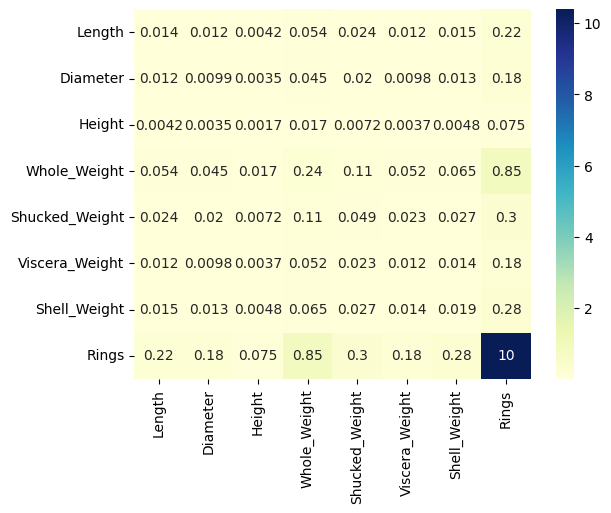

In [438]:
# Mostrando na forma de mapa de calor
sbn.heatmap(data.cov(numeric_only=True), annot=True, cmap='YlGnBu')


Também, é possível visualizar a seguir os _boxplots_ de cada atributo, os quais mostram a distribuição de valores a partir dos limitantes inferior e superior e com uma "caixa" que indica a concentração de valores.


<Axes: >

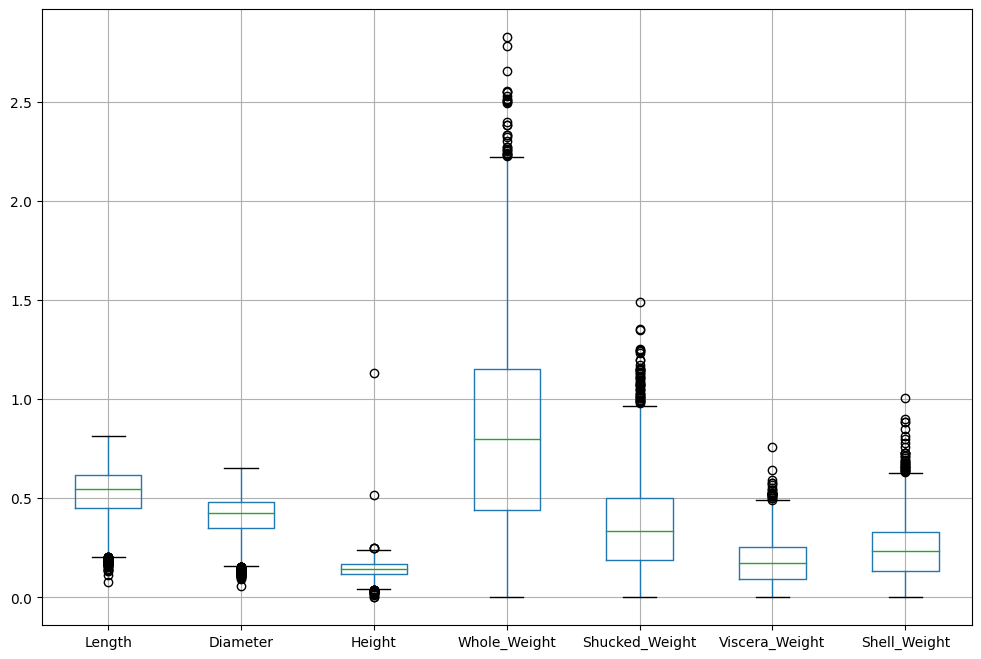

In [439]:
# Plotando todos os boxplots num mesmo gráfico, exceto as classes "Rings"
data.boxplot(column=['Length', 'Diameter', 'Height', 'Whole_Weight',
                     'Shucked_Weight', 'Viscera_Weight', 'Shell_Weight'], figsize=(12, 8))


Por fim, outro tipo de gráfico bastante usado para análise é o de _scatter_. Abaixo, é possível visualizar os dados de cada classe como pontos na tupla de atributos relacionados _Viscera_Weight, Shell_Weight_.


<Axes: xlabel='Viscera_Weight', ylabel='Shell_Weight'>

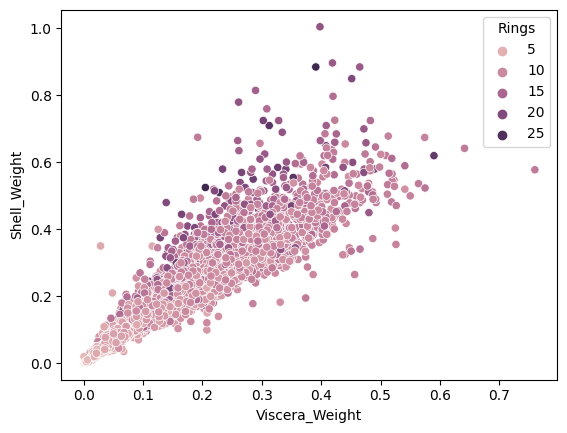

In [440]:
sbn.scatterplot(data=data, x='Viscera_Weight', y='Shell_Weight', hue='Rings')


É possível perceber, com os gráficos acima, a grande proximidade de magnitude dos valores dos atributos, com a existência de muitos _outliers_. As classes, como é possível visualizar principalmente pelo _scatterplot_ acima, quando relacionadas aos atributos _Viscera_Weight, Shell_Weight_, são bem próximas umas das outras.


## <strong> Pré-Processamento dos Dados </strong>


O pré-processamento consiste na aplicação de diversas técnicas para limpar, selecionar e transformar os dados para melhorar a análise dos mesmos. Algumas técnicas: Agregação, _Sampling_, **_Feature Selection_**, **Redução da Dimensionalidade**, **_Feature Creation_**, Discretização/Binarização, dentre outras.


### Tratamento de Dados Perdidos ou Inexistentes (NaN)


Não é incomum que um dado não tenha um ou mais valores de atributos, devido a informações não coletadas ou, até mesmo, esses atributos não se aplicarem às instâncias de dados. Contudo, independente do motivo em que há a falta de dados, é necessário realizar um tratamento para evitar problemas de análise. O tratamento para os chamados "dados perdidos" (ou inexistentes) pode ser realizado de duas principais formas: substituir os valores pela mediana daquele atributo; ou simplesmente descartar aquele dado.


Para verificar se algum dado está faltando, **caso não seja indicado pela descrição do _dataset_**, pode ser realizado a seguinte operação de força-bruta:


In [441]:
# Substituindo os dados faltantes '?' por 'np.NaN' para ser possível analisar
data = data.replace('?', np.NaN)

print('Número de Instâncias = {0}'.format(data.shape[0]))
print('Número de Atributos = {0}'.format(data.shape[1]))

# Mostrando a quantidade total de dados inválidos, por atributo
print('Número de Dados Perdidos:')
for col in data.columns:
    print('\t{0}: {1}'.format(col, data[col].isna().sum()))


Número de Instâncias = 4176
Número de Atributos = 9
Número de Dados Perdidos:
	Sex: 0
	Length: 0
	Diameter: 0
	Height: 0
	Whole_Weight: 0
	Shucked_Weight: 0
	Viscera_Weight: 0
	Shell_Weight: 0
	Rings: 0


Como é possível ver, não há nenhum dado perdido neste _dataset_ e, desta forma, não é necessário realizar nenhum método de tratamento neste contexto.


### Conversão de Dados Categóricos para Discretos: Encodificação


Quando trabalha-se com valores categóricos e deseja-se realizar operações estatísticas mais comuns, como média e desvio-padrão, é necessário a conversão destes dados categóricos para numéricos. Além dessas operações básicas, como será visto a seguir, os tratamentos recorrentes no pré-processamento e futuramente na aplicação de Redes Neurais normalmente exigem o uso de dados somente numéricos.

Existem vários métodos para realizar a conversão de dados categóricos para discretos: _One Hot Encoding_, _Dummy Encoding_, _Label Encoding_, _Binary Encoding_, dentre outros. Para fins de exemplificação, a seguir é aplicado o _One Hot Encoding_ para este _dataset_.


In [442]:
# Aplicando o One Hot Encoder em todos os atributos categóricos
data_encoded = pd.get_dummies(data=data, columns=['Sex'])
print(data_encoded)
data_encoded.info()


      Length  Diameter  Height  Whole_Weight  Shucked_Weight  Viscera_Weight  \
0      0.350     0.265   0.090        0.2255          0.0995          0.0485   
1      0.530     0.420   0.135        0.6770          0.2565          0.1415   
2      0.440     0.365   0.125        0.5160          0.2155          0.1140   
3      0.330     0.255   0.080        0.2050          0.0895          0.0395   
4      0.425     0.300   0.095        0.3515          0.1410          0.0775   
...      ...       ...     ...           ...             ...             ...   
4171   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4172   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4173   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4174   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4175   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_Weight  Rings  Sex_F  Sex_I

Como mostra acima, cada atributo categórico de cada classe virou um valor binário _True_ ou _False_.


In [443]:
# Percorrer cada atributo (coluna) e mostrar os dados estatísticos básicos de cada um
print('Média')
print(data_encoded.mean())
print('\n')

print('Desvio-Padrão')
print(data_encoded.std())


Média
Length            0.524009
Diameter          0.407892
Height            0.139527
Whole_Weight      0.828818
Shucked_Weight    0.359400
Viscera_Weight    0.180613
Shell_Weight      0.238852
Rings             9.932471
Sex_F             0.312979
Sex_I             0.321360
Sex_M             0.365661
dtype: float64


Desvio-Padrão
Length            0.120103
Diameter          0.099250
Height            0.041826
Whole_Weight      0.490424
Shucked_Weight    0.221980
Viscera_Weight    0.109620
Shell_Weight      0.139213
Rings             3.223601
Sex_F             0.463761
Sex_I             0.467055
Sex_M             0.481673
dtype: float64


<Axes: >

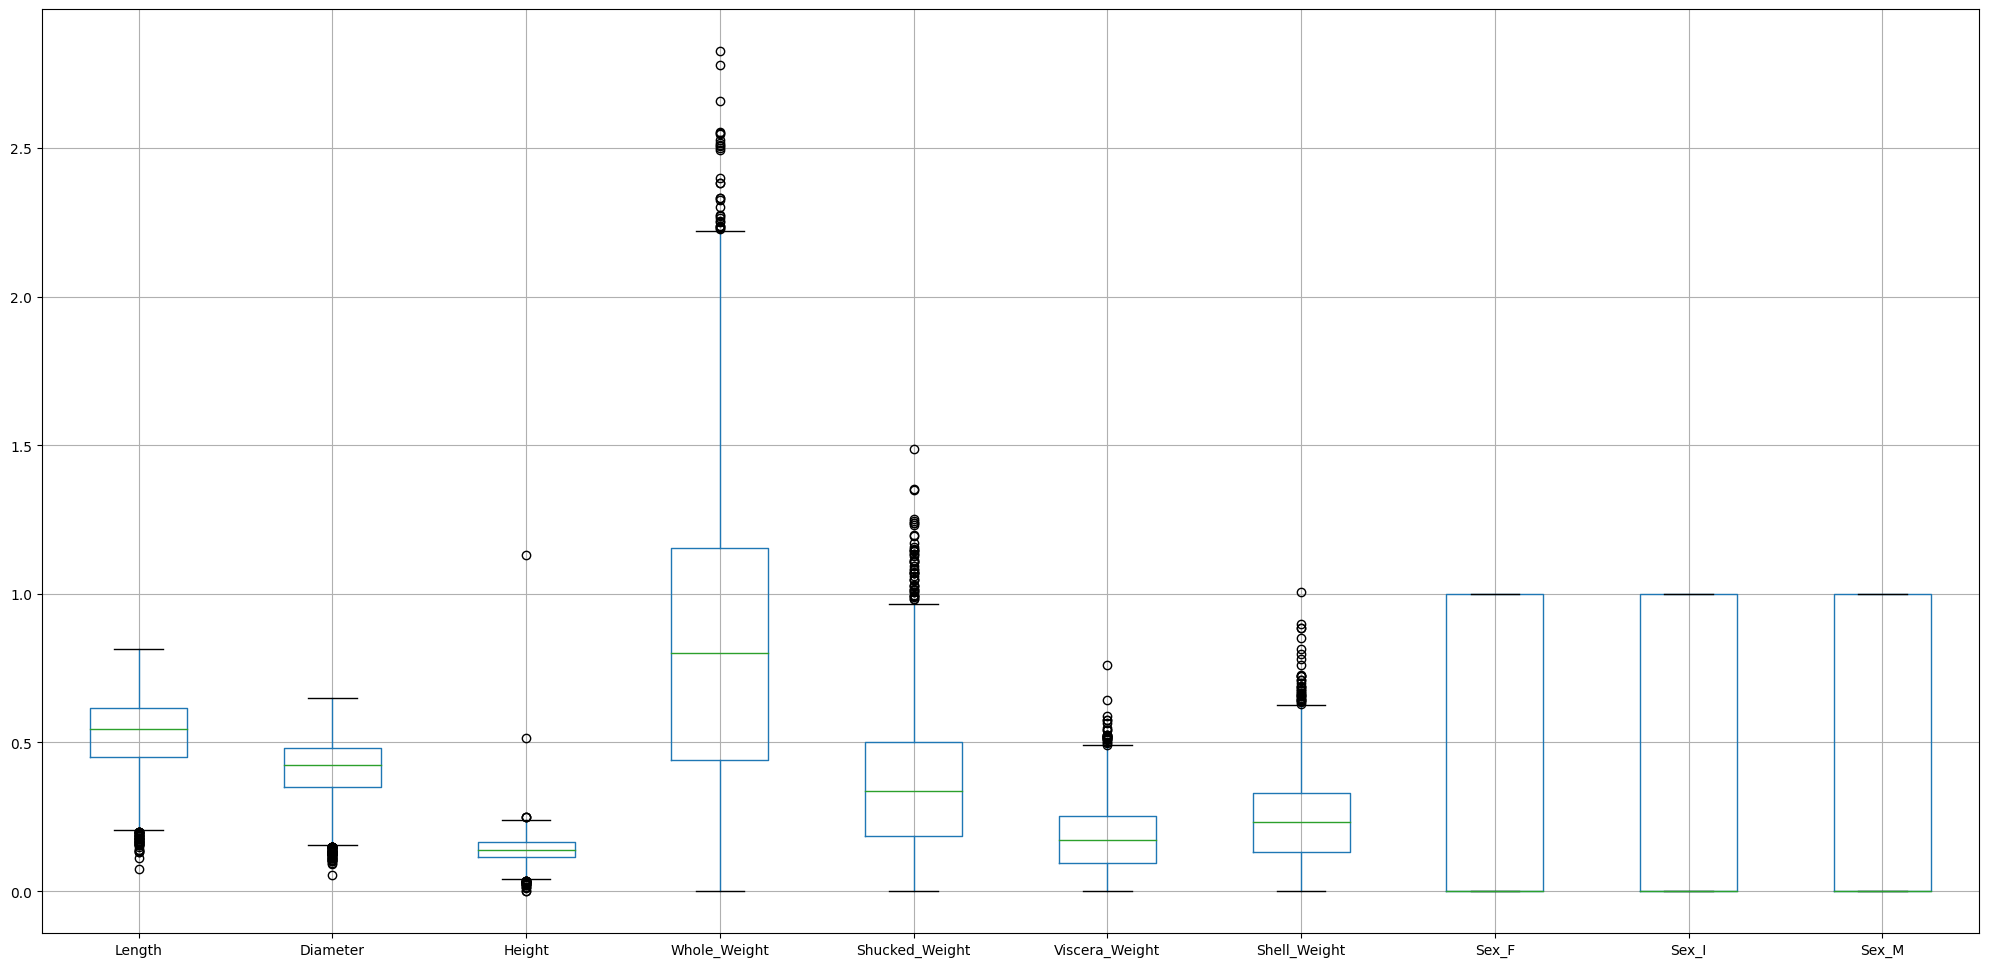

In [444]:
# Gráfico de boxplot para os dados encodificados
data_encoded_without_class = data_encoded.drop(labels=['Rings'], axis=1)
data_encoded_without_class.boxplot(figsize=(25, 12))


### Conversão de Dados Numéricos para Categóricos: Discretização


Quando trabalha-se com valores numéricos e análises mais gerais dos dados, comumente utiliza-se o processo de discretização. Este processo simboliza a conversão de um atributo numérico em um atributo categórico. É realizado em duas subtarefas: decidir quantas categorias serão criadas e determinar como mapear os valores do atributo numérico para essas categorias.

Para fins de exemplificação, o atributo _Whole_Weight_ será discretizado por alguns métodos.


In [445]:
# Aplicando a discretização supervisionada, via método por largura
discret = pd.cut(x=data['Whole_Weight'], bins=5)  # 5 intervalos
discret.value_counts(sort=False)


Whole_Weight
(-0.000824, 0.567]    1414
(0.567, 1.131]        1651
(1.131, 1.696]         902
(1.696, 2.261]         187
(2.261, 2.826]          22
Name: count, dtype: int64

In [446]:
# Aplicando a discretização supervisionada, via método por frequência
discret = pd.qcut(x=data['Whole_Weight'], q=5)  # 5 intervalos
discret.value_counts(sort=False)


Whole_Weight
(0.001, 0.366]    837
(0.366, 0.646]    834
(0.646, 0.93]     836
(0.93, 1.24]      835
(1.24, 2.826]     834
Name: count, dtype: int64

In [447]:
# Importação do Discretizador K-Means (Não Supervisionado)
from sklearn.preprocessing import KBinsDiscretizer

# Aplicando a discretização não supervisionado, via método 'K-Means'
discret = KBinsDiscretizer(n_bins=5, encode='ordinal',
                           strategy='kmeans').fit_transform(data.drop(labels=['Sex', 'Rings'], axis=1))  # 5 intervalos
print(discret)


[[1. 1. 0. ... 0. 0. 0.]
 [3. 3. 1. ... 1. 1. 1.]
 [2. 2. 1. ... 1. 1. 1.]
 ...
 [3. 3. 2. ... 2. 3. 2.]
 [4. 3. 1. ... 2. 3. 2.]
 [4. 4. 2. ... 4. 4. 3.]]


### Tratamento de _Outliers_ (Ruídos)


Os _Outliers_ simbolizam dados com características que são consideravelmente diferentes da maioria dos outros dados em um _dataset_. Em outras palavras, simbolizam ruídos que atrapalham ou ajudam na análise dos dados, dependendo do objetivo.

Para identificá-los, é possível por duas abordagens: com base na possibilidade de obter exemplos rotulados pelo usuário, como pelos métodos supervisionados; ou com base em suposições sobre dados normais, como pelo **DBSCAN**. Uma maneira comum consiste em encontrar os percentis e calcular o gráfico de _boxplot_, sendo que os _outliers_ devem seguir as seguintes condições, com base nos limitantes inferior (LB) e superior (UB) do gráfico:

- **Oulier < LB:** Outlier = (Q1 - 1.5 \* IQR), em que Q1 é o percentil de 25%
- **Outlier > UB:** Outlier = (Q3 + 1.5 \* IQR), em que Q3 é o percentil de 75%


Em termos práticos, os gráficos de _boxplot_ deste _dataset_ para os atributos _Viscera_Weight_ e _Shell_Weight_, visto com _outlier_ anteriormente, podem ser vistos a seguir.


<Axes: >

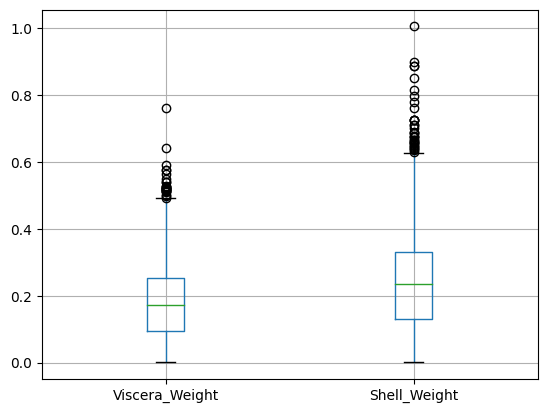

In [448]:
# Plotando o boxplot para 'Viscera_Weight' e 'Shell_Weight'
data.boxplot(column=['Viscera_Weight', 'Shell_Weight'])


Como pode ser visto acima, ambos os atributos possuem _outliers_ no limitante superior.

Para remover os _outliers_, por meio dos percentis, basta aplicar a seguinte função:


In [449]:
# Função para remoção dos outliers por meio dos percentis (IQR)
# Disponível em: https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
def remove_outlier_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    LB = Q1-1.5*IQR
    UB = Q3+1.5*IQR
    return df[(df < LB) | (df > UB)]


Aplicando a função e removendo a maioria de _outliers_ dos atributos _Viscera_Weigh_ e _Shell_Weight_:


In [450]:
# Removendo os outliers de 'Viscera_Weight'
data_outlier_removed = remove_outlier_IQR(data['Viscera_Weight'])

# Atualizando o dataset principal com a remoção dos outliers
data_iqr = data.drop(data_outlier_removed.index)

# Removendo os outliers de 'Shell_Weight'
data_outlier_removed = remove_outlier_IQR(data_iqr['Shell_Weight'])

# Atualizando o dataset principal com a remoção dos outliers
data_iqr = data_iqr.drop(data_outlier_removed.index)


<Axes: >

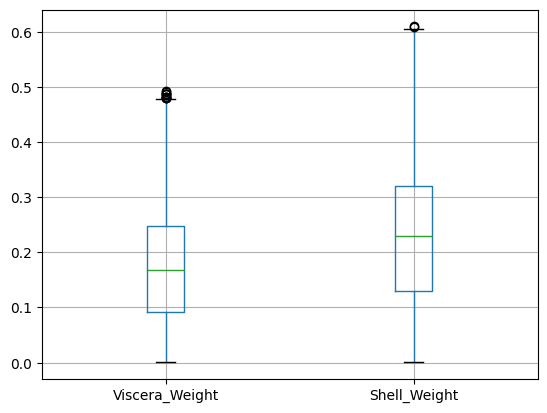

In [451]:
# Plotando novamente os boxplots para 'Viscera_Weight' e 'Shell_Weight', desta vez com outliers removidos
data_iqr.boxplot(column=['Viscera_Weight', 'Shell_Weight'])


### Agregação


A agregação é uma tarefa que consistem em combinar os valores de dois ou mais objetos do _dataset_, de tal forma em que se possa reduzir a dimensionalidade do problema, alterar a granularidade da análise e melhorar a estabilidade dos dados. Deve ser aplicada quando possível, por exemplo em um _dataset_ em que há _as transações de vendas de uma única loja_.

Para exemplificar, a seguir estão os _boxplots_ dos atributos _Whole_Weight_ e _Shucked_Weight_ do _dataset_ agregado apenas para a classe **_Rings=9_**.


     Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  \
1      F   0.530     0.420   0.135        0.6770          0.2565   
7      M   0.475     0.370   0.125        0.5095          0.2165   
18     M   0.450     0.320   0.100        0.3810          0.1705   
22     F   0.550     0.415   0.135        0.7635          0.3180   
38     M   0.355     0.290   0.090        0.3275          0.1340   
...   ..     ...       ...     ...           ...             ...   
4133   F   0.595     0.455   0.140        0.9140          0.3895   
4135   F   0.615     0.495   0.155        1.0805          0.5200   
4158   F   0.560     0.440   0.135        0.8025          0.3500   
4166   M   0.500     0.380   0.125        0.5770          0.2690   
4173   M   0.600     0.475   0.205        1.1760          0.5255   

      Viscera_Weight  Shell_Weight  Rings  
1             0.1415        0.2100      9  
7             0.1125        0.1650      9  
18            0.0750        0.1150      9  
22     

<Axes: >

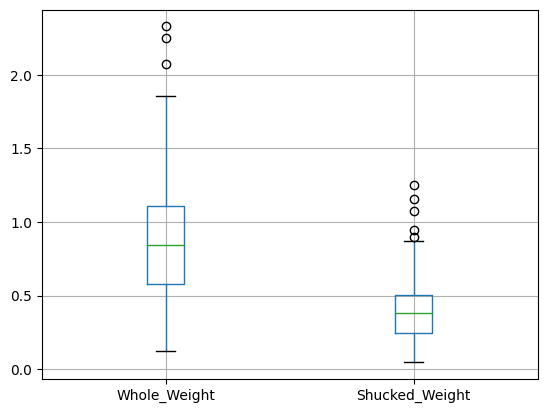

In [452]:
# Recuperando apenas os dados relacionados a classe 'Rings=9'
data_nine_rings = data[data['Rings'] == 9]
print(data_nine_rings)

# Plotando o boxplot de 'Whole_Weight' e 'Shucked_Weight'
data_nine_rings.boxplot(column=['Whole_Weight', 'Shucked_Weight'])


Nesta agregação, é possível visualizar somente os dados relacionados à classe _Rings=9_ e, desta forma, é possível realizar uma análise mais específica a respeito desta classe, como no que diz respeito a existência de _outliers_ inferiores e superiores dos atributos _Whole_Weight_ e _Shucked_Weight_.


### Amostragem


A amostragem, ou _sampling_, é a principal técnica empregada para reduzir dados nos _datasets_ e é utilizada frequentemente para realizar uma investigação preliminar dos dados e a análise final dos mesmos. Ainda que existam vários métodos disponíveis desta técnica, dois são mais recorrentes: amostragem sem substituição, em que cada dado selecionado é removido do conjunto original; e a amostragem com substituição, em que cada dado selecionado não é removido e pode ser selecionado mais de uma vez posteriormente.

O código abaixo exemplifica esta técnica por meio do método de amostragem sem substituição.


In [453]:
# Copiando o dataset original para exemplificar
data_sampling = cp(data)

# Realizando uma amostragem com 10 dados selecionados aleatoriamente
sample = data_sampling.sample(n=10)
sample


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
2601,M,0.615,0.470,0.155,1.2000,0.5085,0.3200,0.2920,8
1818,M,0.695,0.530,0.190,1.7260,0.7625,0.4360,0.4550,11
1348,M,0.590,0.455,0.155,0.8855,0.3880,0.1880,0.2750,10
1089,I,0.450,0.330,0.100,0.4110,0.1945,0.1000,0.0980,6
65,F,0.565,0.440,0.160,0.9150,0.3540,0.1935,0.3200,12
3177,M,0.380,0.300,0.100,0.2505,0.1060,0.0535,0.0775,8
320,I,0.190,0.145,0.040,0.0380,0.0165,0.0065,0.0150,4
3349,I,0.445,0.345,0.130,0.4075,0.1365,0.0645,0.1800,11
3897,F,0.565,0.460,0.150,0.8765,0.3455,0.1925,0.2750,10
569,I,0.450,0.350,0.140,0.4740,0.2100,0.1090,0.1275,16


In [454]:
# Também, é possível realizar a amostragem por meio da seleção percentual de dados desejados
# Seleção de 0,1% dos dados
sample = data_sampling.sample(frac=0.001, random_state=42)
sample


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
866,F,0.615,0.500,0.175,1.3770,0.5585,0.3300,0.2920,12
1483,F,0.590,0.465,0.150,1.1510,0.6130,0.2390,0.2515,9
599,I,0.535,0.420,0.145,0.9260,0.3980,0.1965,0.2500,17
1702,F,0.640,0.505,0.165,1.2235,0.5215,0.2695,0.3600,10


Já abaixo, é possível visualizar a aplicação de amostragem com substituição.


In [455]:
# Realização de amostragem com substituição e por meio de seleção percentual
sample = data_sampling.sample(frac=0.001, random_state=42, replace=True)
sample


,Sex,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Rings
860,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,12
3772,F,0.575,0.460,0.150,0.927,0.3330,0.2070,0.2985,9
3092,F,0.520,0.430,0.150,0.728,0.3020,0.1575,0.2350,11
466,M,0.655,0.530,0.195,1.388,0.5670,0.2735,0.4100,13


### Normalização e Testes de Normalidade


A normalização é um processo crucial para a análise de dados, uma vez que é responsável por tratar as questões relacionadas com a **magnitude** das características. Em outras palavras, a escala de cada variável influencia diretamente o coeficiente de regressão e, desta forma, as variáveis com uma magnitude mais significativa predominam sobre as que têm um intervalo de magnitude menor. Em termos práticos, quando aplicados em Redes Neurais, essa diferença significativa de magnitude dos atributos afeta negativamente a convergência do gradiente descendente, tornando o processo de treinamento mais lento. Grande parte dos algoritmos de classificação são sensíveis à magnitude, como: Redes Neurais, SVMs, KNN, K-Means, PCA, dentre outros.

Neste cenário, alguns métodos de normalização são bastante utilizados, como o _Standardization_ (_Z-Score_) e o _Normalization_. O _Standardization_ redimensiona a distribuição de valores para que a média dos valores observados seja 0 e o desvio padrão seja 1. Este método preserva a forma da distribuição original e os _outliers_. Já o _Normalization_ subtrai o valor mínimo de todas as variáveis e, em seguida, divide-o pelo intervalo de valores, comprimindo o valor final entre 0 e 1. Neste método, a forma da distribuição original é perdida e os valores estão contidos entre o intervalo [0, 1], sendo bem sensível aos _outliers_.

Vale ressaltar que, para os atributos categóricos, este processo foi visto anteriormente com a **Encodificação**, uma vez que transforma os valores categóricos em discretos e, desta forma, sendo possíveis de processamento para os algoritmos de classificação, por exemplo.

Para exemplificar, a seguir o _dataset_ é normalizado por meio do _Z-Score_.


In [456]:
# Mostrando os dados não normalizados
print('Dados Não Normalizados')
print(data.drop(['Sex', 'Rings'], axis=1))
print("\n")

# Antes de tudo, remove-se os atributos categóricos
data_normalized = data.drop(['Sex', 'Rings'], axis=1)

# Aplicando a Normalização com Z-Score
for column in data_normalized.columns:
    data_normalized[column] = (data_normalized[column] -
                               data_normalized[column].mean()) / data_normalized[column].std()

# Mostrando os dados normalizados
print('Dados Normalizados com Z-Score')
print(data_normalized)


Dados Não Normalizados
      Length  Diameter  Height  Whole_Weight  Shucked_Weight  Viscera_Weight  \
0      0.350     0.265   0.090        0.2255          0.0995          0.0485   
1      0.530     0.420   0.135        0.6770          0.2565          0.1415   
2      0.440     0.365   0.125        0.5160          0.2155          0.1140   
3      0.330     0.255   0.080        0.2050          0.0895          0.0395   
4      0.425     0.300   0.095        0.3515          0.1410          0.0775   
...      ...       ...     ...           ...             ...             ...   
4171   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4172   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4173   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4174   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4175   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell_Weig

Com isso, é possível traçar os _boxplots_ de todos os atributos de uma maneira mais visível, ao contrário daquele que foi visto anteriormente.


<Axes: >

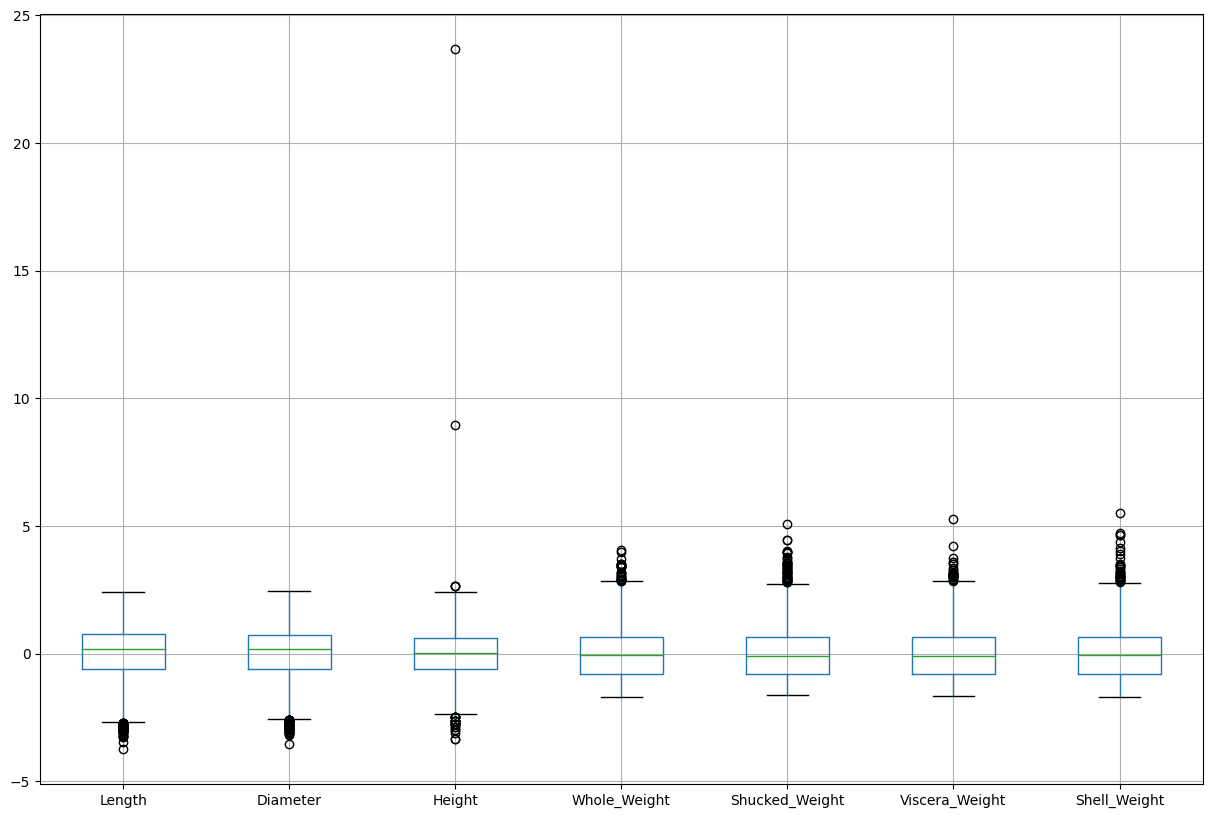

In [457]:
# Mostrando o gráfico boxplot para todos os atributos
data_normalized.boxplot(figsize=(15, 10))


Também, é possível visualizar se o conjunto suporta o processo de normalização por meio dos chamados Testes de Normalização.
Para tanto, deve-se considerar os seguintes resultados:

- _H0_: A amostra é proveniente de uma população com distribuição normal, com média e desvio-padrão desconhecidos.
- _H1_: A amostra não é proveniente de uma população com distribuição normal.

Os dois principais testes de normalização são: Teste de Shapiro-Wilk e Teste de Kolmogorov-Smirnov. Ambos podem ser acessados por meio da biblioteca _scipy.stats_.


### Seleção de Características


A seleção de características, ou _feature selection_, consistem em um conjunto de técnicas com o objetivo reduzir majoritariamente a dimensionalidade do _dataset_. Essas técnicas são dividas em: _brute-force_, _filter_, _wrapper_ e _embedded_. Também, vale ressaltar a importância deste processo para a obtenção de modelos mais simples e, desta forma, mais fáceis de serem interpretados e treinados por Redes Neurais.

Para exemplificar, a seguir são realizados três métodos de **Filtro de Correlação** da técnica _filter_.


#### Filtro de Correlação


A correlação busca entender, essencialmente, como uma variável se comporta em um cenário onde outra variável está mudando. Ou seja, trata-se de métodos estatísticos para se medir as relações entre as variáveis e busca identificar se existe alguma relação entre elas.

A seguir, são aplicados três tipos de métodos de Filtro de Correlação: de Pearson, de Kendall e de Spearman.


##### Coeficiente de Correlação de Pearson


O Coeficiente de Correlação de Pearson busca encontrar a força das **relações lineares** entre duas variáveis.


In [458]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Pearson")
data.drop(['Sex', 'Rings'], axis=1).corr(method='pearson', numeric_only=True)


Correlação de Pearson


,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326
Whole_Weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351
Shucked_Weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606
Viscera_Weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647
Shell_Weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000


<Axes: >

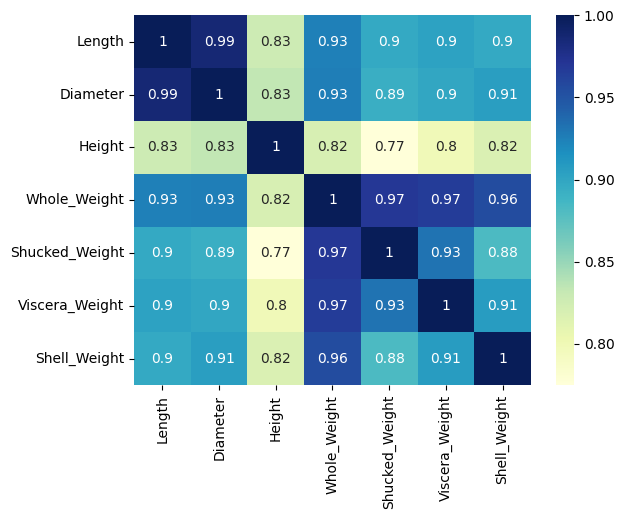

In [459]:
# Plotando o mapa de calor da correlação de Pearson
sbn.heatmap(data.drop(['Sex', 'Rings'], axis=1).corr(method='pearson', numeric_only=True),
            annot=True, cmap='YlGnBu')


##### Coeficiente de Correlação de Kendall


O Coeficiente de Correlação de Kendall busca medir a força da **associação ordinal** entre duas variáveis.


In [460]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Kendall")
data.drop(['Sex', 'Rings'], axis=1).corr(method='kendall', numeric_only=True)


Correlação de Kendall


,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
Length,1.000000,0.908120,0.734693,0.872524,0.835604,0.826253,0.823587
Diameter,0.908120,1.000000,0.747632,0.873736,0.824451,0.820286,0.840204
Height,0.734693,0.747632,1.000000,0.771390,0.712070,0.748404,0.781910
Whole_Weight,0.872524,0.873736,0.771390,1.000000,0.879583,0.870726,0.862177
Shucked_Weight,0.835604,0.824451,0.712070,0.879583,1.000000,0.809643,0.764456
Viscera_Weight,0.826253,0.820286,0.748404,0.870726,0.809643,1.000000,0.797533
Shell_Weight,0.823587,0.840204,0.781910,0.862177,0.764456,0.797533,1.000000


<Axes: >

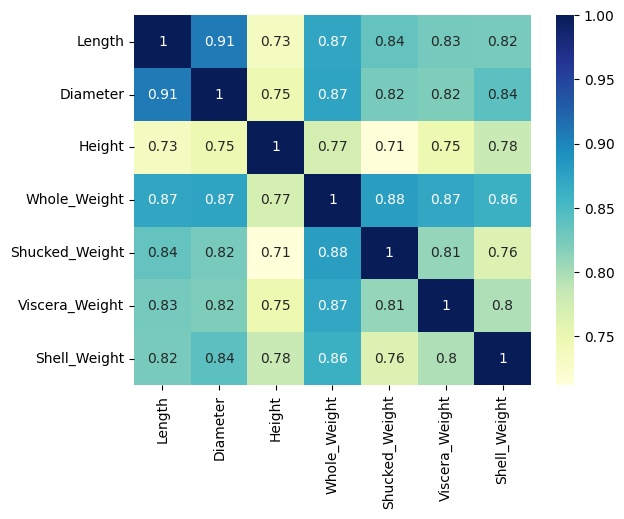

In [461]:
# Plotando o mapa de calor da correlação de Kendall
sbn.heatmap(data.drop(['Sex', 'Rings'], axis=1).corr(method='kendall', numeric_only=True),
            annot=True, cmap='YlGnBu')


##### Coeficiente de Correlação de Spearman


O Coeficiente de Correlação de Spearman busca encontrar a força das **relações monotônicas (lineares ou não)** entre duas variáveis.


In [462]:
# Mostrando a correlação de Pearson entre os atributos do dataset atual
print("Correlação de Spearman")
data.drop(['Sex', 'Rings'], axis=1).corr(method='spearman', numeric_only=True)


Correlação de Spearman


,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
Length,1.000000,0.983315,0.888170,0.972623,0.956819,0.952636,0.947904
Diameter,0.983315,1.000000,0.895696,0.971313,0.950456,0.948370,0.954130
Height,0.888170,0.895696,1.000000,0.915985,0.874187,0.900561,0.921225
Whole_Weight,0.972623,0.971313,0.915985,1.000000,0.977052,0.975242,0.969414
Shucked_Weight,0.956819,0.950456,0.874187,0.977052,1.000000,0.947619,0.917700
Viscera_Weight,0.952636,0.948370,0.900561,0.975242,0.947619,1.000000,0.938117
Shell_Weight,0.947904,0.954130,0.921225,0.969414,0.917700,0.938117,1.000000


<Axes: >

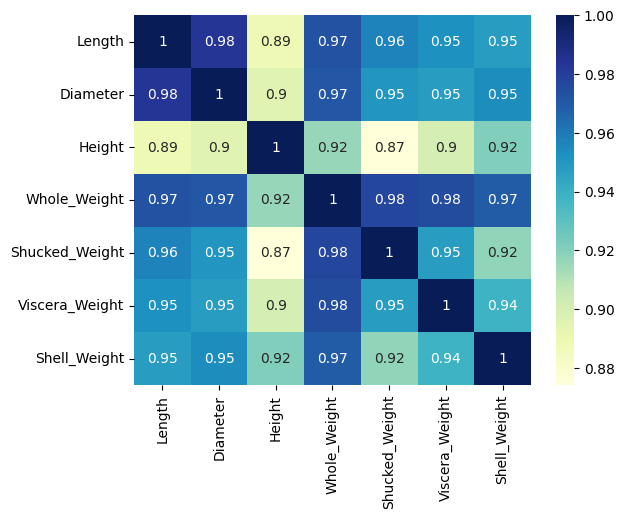

In [463]:
# Plotando o mapa de calor da correlação de Spearman
sbn.heatmap(data.drop(['Sex', 'Rings'], axis=1).corr(method='spearman', numeric_only=True),
            annot=True, cmap='YlGnBu')


#### _Principal Component Analysis_ (PCA)


O _Principal Component Analysis_ (PCA) é um dos principais métodos para reduzir a dimensionalidade do _dataset_, projetando os dados de seu espaço original de alta dimensão em um espaço de dimensão inferior. Os novos atributos, também chamados de componentes, criados pelo PCA devem ter as seguintes propriedades: são combinações lineares dos atributos originais; são ortogonais entre si; e capturam a quantidade máxima de variação nos dados.

O método do PCA é aplicado a partir dos seguintes passos, de forma ordenada: normalização; computação da matriz de covariância; cálculo dos vetores próprios e os valores próprios da matriz de covariância para identificar os componentes principais; calcular o vetor de características; e reformular os dados ao longo dos eixos de componentes principais.

Para fins exemplares, a aplicação do PCA para este _dataset_ é vista a seguir.


In [464]:
# Importação do método de normalização Z-Score automático
from sklearn.preprocessing import StandardScaler

# Importação do PCA
from sklearn.decomposition import PCA

# Antes de tudo, remove-se o atributo que define a classe
data_pca = data.drop(['Sex', 'Rings'], axis=1)

# Primeiro: normalizar o conjunto de dados
data_pca_normalized = StandardScaler().fit_transform(data_pca)  # Z-Score
print('Dados Normalizados (Z-Score)')
print(data_pca_normalized)


Dados Normalizados (Z-Score)
[[-1.44900723 -1.43989229 -1.18425209 ... -1.17096695 -1.20532696
  -1.21305408]
 [ 0.0498915   0.12201495 -0.10824748 ... -0.46361041 -0.35684354
  -0.20727719]
 [-0.69955786 -0.4322102  -0.34735962 ... -0.64833409 -0.60773918
  -0.60240383]
 ...
 [ 0.63279657  0.67624011  1.56553747 ...  0.74835715  0.97518418
   0.49676663]
 [ 0.84097695  0.77700832  0.25042072 ...  0.77313716  0.73341202
   0.41055718]
 [ 1.54879024  1.48238578  1.32642533 ...  2.64064851  1.78717368
   1.84019719]]


In [465]:
# Definindo o número de componentes do PCA
n_components = 2  # 2 para colocar em gráfico X por Y

# Aplicando o PCA
pca = PCA(n_components=n_components)
projected_data = pca.fit_transform(data_pca_normalized)

# Mostrando os dados projetados com PCA
print('Dados Projetados com PCA')
print(projected_data)
print("\n")

# Segundo: mostrando a matriz de covariância do PCA
print('Variâncias')
print(pca.explained_variance_ratio_)
print("\n")

# Terceiro: mostrando os componentes do PCA
component_names = ['component {}'.format(
    i) for i in range(len(pca.components_))]
components_pca = pd.DataFrame(
    data=pca.components_, index=component_names, columns=data_pca.columns)
components_pca.head()


Dados Projetados com PCA
[[-3.36293777 -0.10536702]
 [-0.4827292   0.25201601]
 [-1.50935963  0.2074811 ]
 ...
 [ 2.16683996  0.72389821]
 [ 1.64696392 -0.30517315]
 [ 4.89379839 -0.70582688]]


Variâncias
[0.90786859 0.03992282]




,Length,Diameter,Height,Whole_Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
component 0,0.383251,0.383576,0.348143,0.390674,0.378187,0.381512,0.378921
component 1,0.037944,0.065452,0.866779,-0.233301,-0.348037,-0.252984,-0.058393


<Axes: >

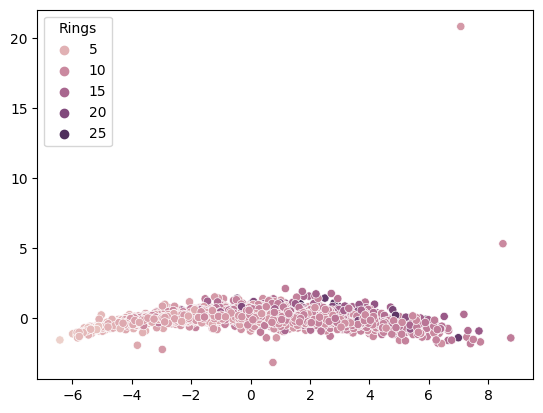

In [466]:
# Gráfico do PCA, com a dimensionalidade reduzida para 2
ins_class = data['Rings']
sbn.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1], hue=ins_class)
